In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [8]:
covid_data = pd.read_csv(r'D:\Hackathon\Dataset.csv')
hepatitis_data= pd.read_csv(r'D:\Hackathon\hep.csv')
measles_data = pd.read_csv(r'D:\Hackathon\mea.csv')
mumps_data = pd.read_csv(r'D:\Hackathon\mum.csv')
pertussis_data = pd.read_csv(r'D:\Hackathon\per.csv')
polio_data = pd.read_csv(r'D:\Hackathon\pol.csv')
rubella_data = pd.read_csv(r'D:\Hackathon\rub.csv')
smallpox_data = pd.read_csv(r'D:\Hackathon\sma.csv')

In [9]:
print(covid_data.head())
print(hepatitis_data.head())
print(measles_data.head())
print(mumps_data.head())
print(pertussis_data.head())
print(polio_data.head())
print(rubella_data.head())
print(smallpox_data.head())

  Date_reported Country_code     Country WHO_region  New_cases  \
0    2020-01-04           AI    Anguilla        AMR        NaN   
1    2020-01-04           AZ  Azerbaijan        EUR        NaN   
2    2020-01-04           BB    Barbados        AMR        NaN   
3    2020-01-04           BR      Brazil        AMR        NaN   
4    2020-01-04           BD  Bangladesh       SEAR        0.0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0         NaN                  0  
1                 0         NaN                  0  
2                 0         NaN                  0  
3                 0         NaN                  0  
4                 0         0.0                  0  
     week state  state_name      disease  cases  incidence_per_capita  \
0  196601    AL     ALABAMA  HEPATITIS A      5                  0.14   
1  196601    AR    ARKANSAS  HEPATITIS A     11                  0.58   
2  196601    AZ     ARIZONA  HEPATITIS A      6                  0

In [10]:
print(covid_data.isnull().sum())


Date_reported             0
Country_code           1724
Country                   0
WHO_region                0
New_cases            207631
Cumulative_cases          0
New_deaths           206707
Cumulative_deaths         0
dtype: int64


In [11]:
covid_data = covid_data.dropna(subset=['New_cases', 'New_deaths'])
print(covid_data.isnull().sum())

Date_reported          0
Country_code         902
Country                0
WHO_region             0
New_cases              0
Cumulative_cases       0
New_deaths             0
Cumulative_deaths      0
dtype: int64


In [12]:
print(hepatitis_data.isnull().sum())


week                    0
state                   0
state_name              0
disease                 0
cases                   0
incidence_per_capita    0
LastDayWeek             0
MonthMax                0
Year                    0
MonthName               0
dtype: int64


In [13]:
print(measles_data.isnull().sum())


week                    0
state                   0
state_name              0
disease                 0
cases                   0
incidence_per_capita    0
LastDayWeek             0
MonthMax                0
Year                    0
MonthName               0
dtype: int64


In [14]:
print(mumps_data.isnull().sum())

week                    0
state                   0
state_name              0
disease                 0
cases                   0
incidence_per_capita    0
LastDayWeek             0
MonthMax                0
Year                    0
MonthName               0
dtype: int64


In [15]:
print(pertussis_data.isnull().sum())


week                    0
state                   0
state_name              0
disease                 0
cases                   0
incidence_per_capita    0
LastDayWeek             0
MonthMax                0
Year                    0
MonthName               0
dtype: int64


In [55]:
print(polio_data.isnull().sum())

week                     0
state                    0
state_name               0
disease                  0
cases                   47
incidence_per_capita     0
LastDayWeek              0
MonthMax                 0
Year                     0
MonthName                0
Month                    0
Day                      0
Week                     0
Day_of_Week              0
Disease                  0
dtype: int64


In [56]:
polio_data = polio_data.dropna(subset=['cases'])
print(polio_data.isnull().sum())

week                    0
state                   0
state_name              0
disease                 0
cases                   0
incidence_per_capita    0
LastDayWeek             0
MonthMax                0
Year                    0
MonthName               0
Month                   0
Day                     0
Week                    0
Day_of_Week             0
Disease                 0
dtype: int64


In [57]:
print(rubella_data.isnull().sum())
print(smallpox_data.isnull().sum())

week                    0
state                   0
state_name              0
disease                 0
cases                   0
incidence_per_capita    0
LastDayWeek             0
MonthMax                0
Year                    0
MonthName               0
Month                   0
Day                     0
Week                    0
Day_of_Week             0
Disease                 0
dtype: int64
week                    0
state                   0
state_name              0
disease                 0
cases                   0
incidence_per_capita    0
LastDayWeek             0
MonthMax                0
Year                    0
MonthName               0
Month                   0
Day                     0
Week                    0
Day_of_Week             0
Disease                 0
dtype: int64


In [58]:
def cap_outliers(data, column):
    upper_limit = data[column].quantile(0.95)
    data[column] = np.where(data[column] > upper_limit, upper_limit, data[column])

In [59]:
# Handle outliers for COVID-19 dataset
cap_outliers(covid_data, 'New_cases')
cap_outliers(covid_data, 'New_deaths')


In [60]:
# Handle outliers for Hepatitis dataset
cap_outliers(hepatitis_data, 'cases') 


In [61]:
cap_outliers(measles_data, 'cases')

In [62]:
cap_outliers(mumps_data, 'cases')

In [63]:
cap_outliers(pertussis_data, 'cases')

In [64]:
print(polio_data.dtypes)


week                    datetime64[ns]
state                           object
state_name                      object
disease                         object
cases                          float64
incidence_per_capita           float64
LastDayWeek                     object
MonthMax                         int64
Year                             int32
MonthName                       object
Month                            int32
Day                              int32
Week                            UInt32
Day_of_Week                      int32
Disease                         object
dtype: object


In [65]:
polio_data['cases'] = pd.to_numeric(polio_data['cases'], errors='coerce')


C:\Users\princ\AppData\Local\Temp\ipykernel_25584\1430000835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polio_data['cases'] = pd.to_numeric(polio_data['cases'], errors='coerce')


In [66]:
cap_outliers(polio_data, 'cases')

C:\Users\princ\AppData\Local\Temp\ipykernel_25584\3271629202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > upper_limit, upper_limit, data[column])


In [67]:
cap_outliers(rubella_data, 'cases')

In [68]:
cap_outliers(smallpox_data, 'cases') 

In [69]:
def visualize_outliers(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=data[column])
    plt.title(title)
    plt.ylabel(column)
    plt.show()

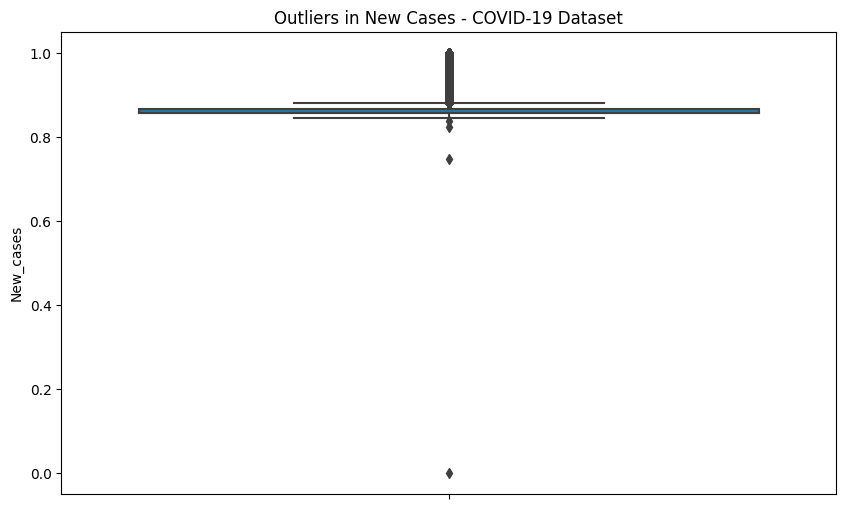

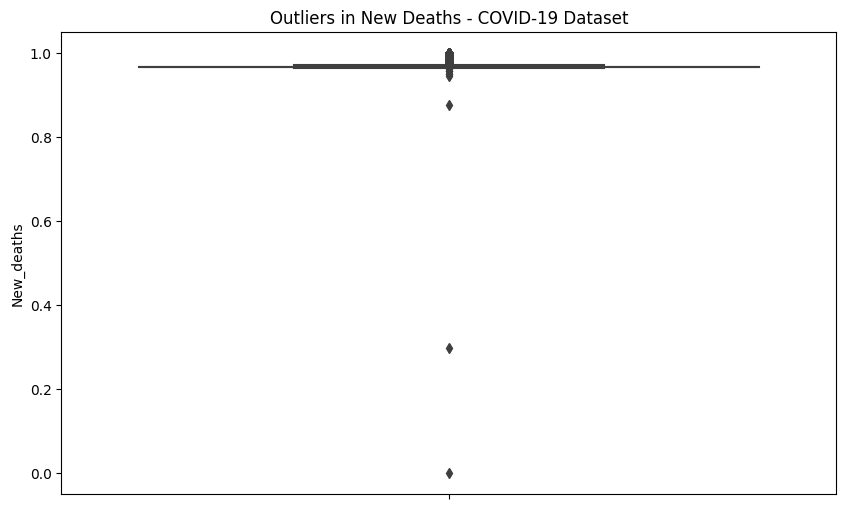

In [70]:
visualize_outliers(covid_data, 'New_cases', 'Outliers in New Cases - COVID-19 Dataset')
visualize_outliers(covid_data, 'New_deaths', 'Outliers in New Deaths - COVID-19 Dataset')


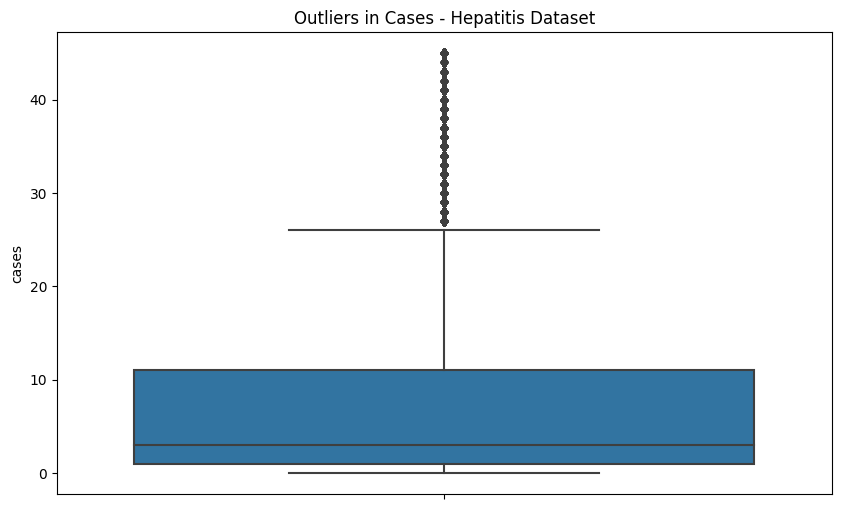

In [32]:
visualize_outliers(hepatitis_data, 'cases', 'Outliers in Cases - Hepatitis Dataset')

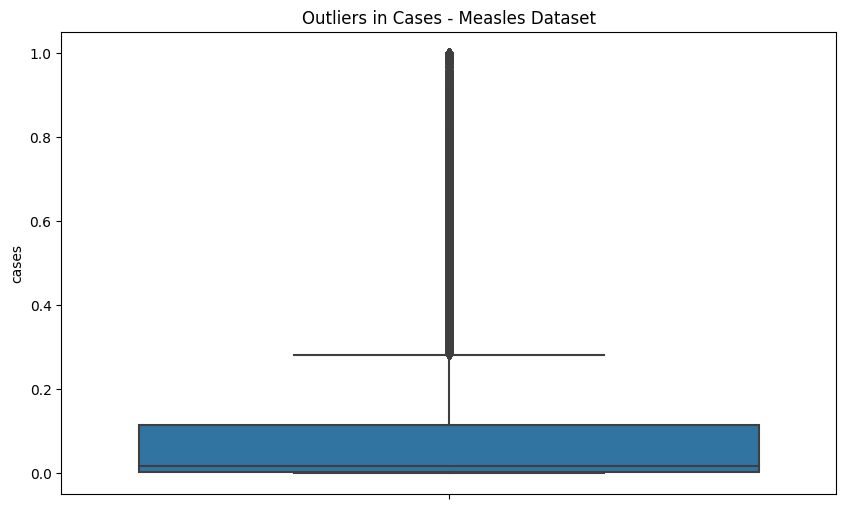

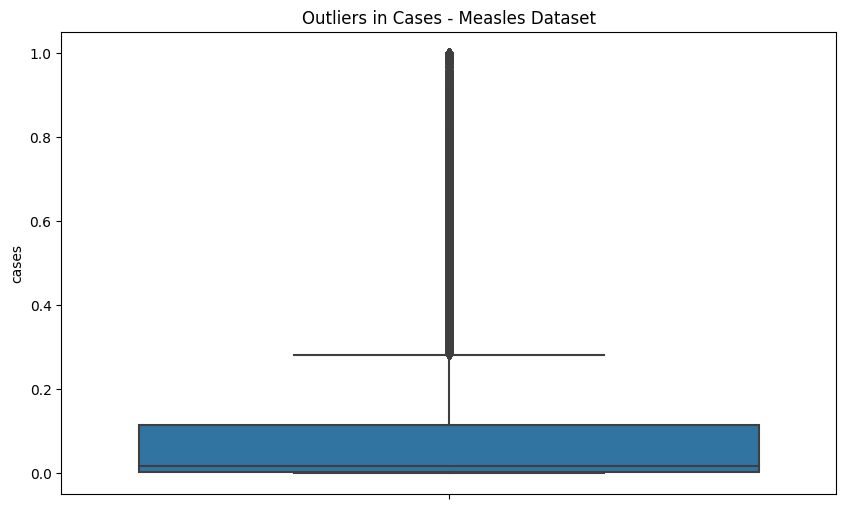

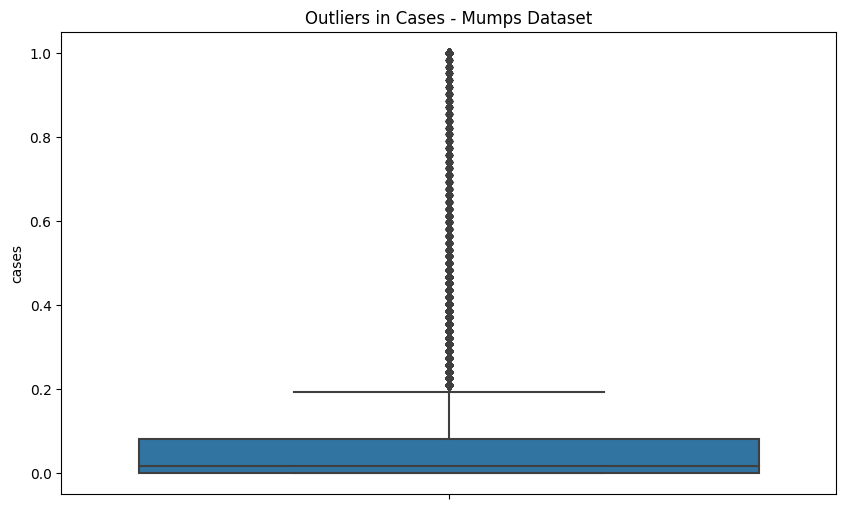

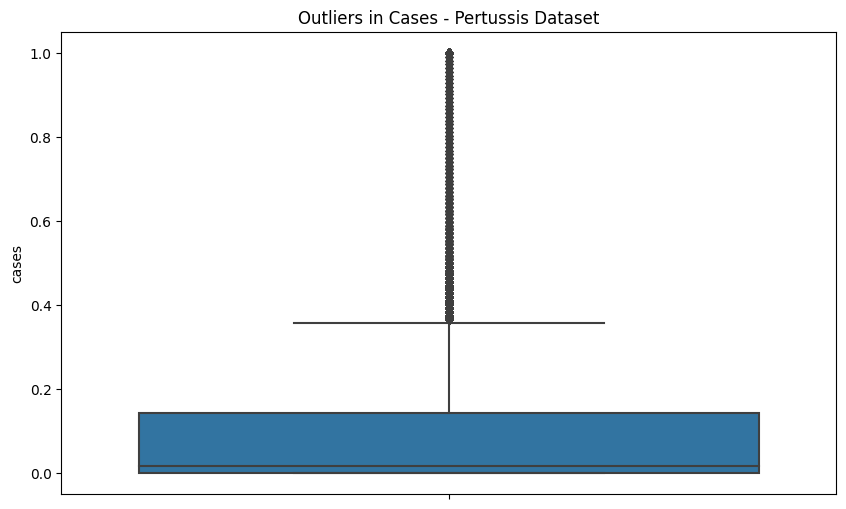

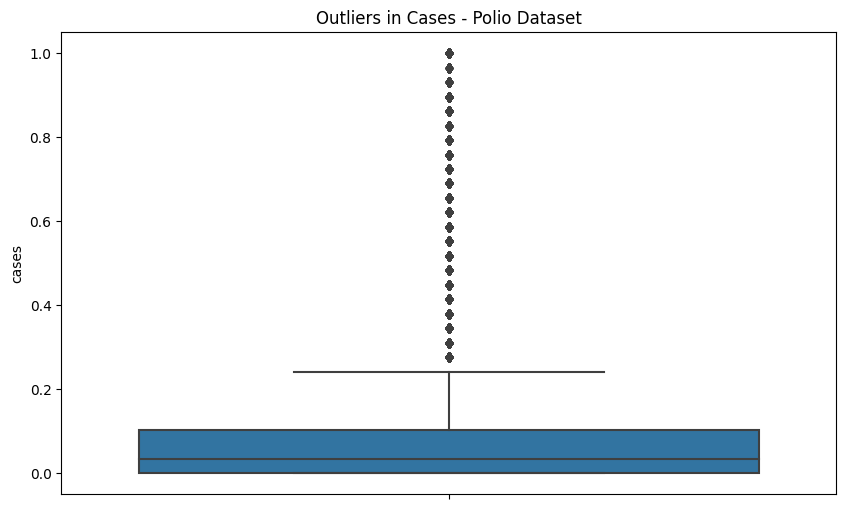

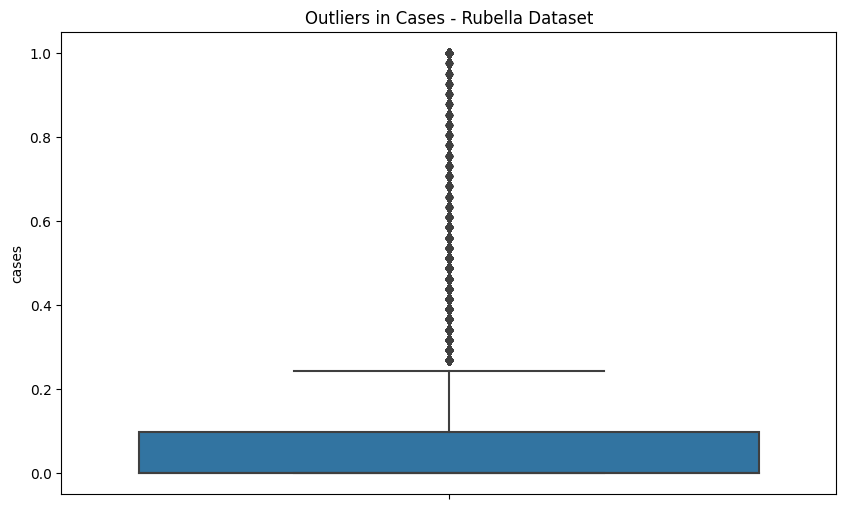

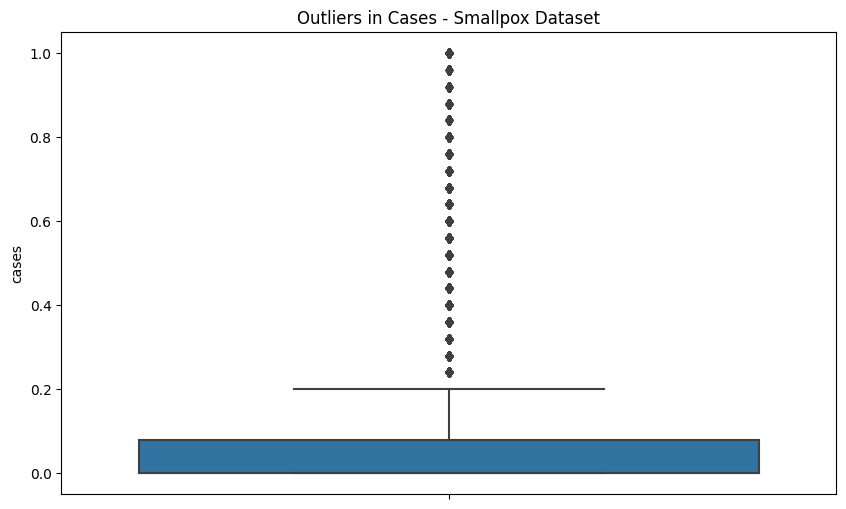

In [71]:
visualize_outliers(measles_data, 'cases', 'Outliers in Cases - Measles Dataset')
visualize_outliers(measles_data, 'cases', 'Outliers in Cases - Measles Dataset')
visualize_outliers(mumps_data, 'cases', 'Outliers in Cases - Mumps Dataset')
visualize_outliers(pertussis_data, 'cases', 'Outliers in Cases - Pertussis Dataset')
visualize_outliers(polio_data, 'cases', 'Outliers in Cases - Polio Dataset')
visualize_outliers(rubella_data, 'cases', 'Outliers in Cases - Rubella Dataset')
visualize_outliers(smallpox_data, 'cases', 'Outliers in Cases - Smallpox Dataset')

In [72]:
# Check for missing values in all datasets
print(covid_data.isnull().sum())
print(hepatitis_data.isnull().sum())
print(measles_data.isnull().sum())
print(mumps_data.isnull().sum())
print(pertussis_data.isnull().sum())
print(polio_data.isnull().sum())
print(rubella_data.isnull().sum())
print(smallpox_data.isnull().sum())


Date_reported          0
Country_code         902
Country                0
WHO_region             0
New_cases              0
Cumulative_cases       0
New_deaths             0
Cumulative_deaths      0
Year                   0
Month                  0
Day                    0
Week                   0
Day_of_Week            0
Disease                0
dtype: int64
week                    0
state                   0
state_name              0
disease                 0
cases                   0
incidence_per_capita    0
LastDayWeek             0
MonthMax                0
Year                    0
MonthName               0
Month                   0
Day                     0
Week                    0
Day_of_Week             0
Disease                 0
dtype: int64
week                    0
state                   0
state_name              0
disease                 0
cases                   0
incidence_per_capita    0
LastDayWeek             0
MonthMax                0
Year                    0


NORMALIZATION


In [73]:
scaler = MinMaxScaler()


In [74]:
covid_data[['New_cases', 'New_deaths']] = scaler.fit_transform(covid_data[['New_cases', 'New_deaths']])


In [75]:
hepatitis_data[['cases']] = scaler.fit_transform(hepatitis_data[['cases']])
measles_data[['cases']] = scaler.fit_transform(measles_data[['cases']])
mumps_data[['cases']] = scaler.fit_transform(mumps_data[['cases']])
pertussis_data[['cases']] = scaler.fit_transform(pertussis_data[['cases']])
polio_data[['cases']] = scaler.fit_transform(polio_data[['cases']])
rubella_data[['cases']] = scaler.fit_transform(rubella_data[['cases']])
smallpox_data[['cases']] = scaler.fit_transform(smallpox_data[['cases']])


C:\Users\princ\AppData\Local\Temp\ipykernel_25584\2482793799.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polio_data[['cases']] = scaler.fit_transform(polio_data[['cases']])


FEATURE ENGINERRING

In [76]:
def feature_engineering(data, date_column, disease_name):
    data[date_column] = pd.to_datetime(data[date_column])
    data['Year'] = data[date_column].dt.year
    data['Month'] = data[date_column].dt.month
    data['Day'] = data[date_column].dt.day
    data['Week'] = data[date_column].dt.isocalendar().week
    data['Day_of_Week'] = data[date_column].dt.dayofweek
    
    # Add disease name column if not present
    if 'Disease' not in data.columns:
        data['Disease'] = disease_name
    
    return data


In [77]:
# Apply feature engineering to each dataset
covid_data = feature_engineering(covid_data, 'Date_reported', 'COVID-19')

In [78]:
hepatitis_data = feature_engineering(hepatitis_data, 'week', 'Hepatitis')

In [79]:
measles_data = feature_engineering(measles_data, 'week', 'Measles')

In [80]:
mumps_data = feature_engineering(mumps_data, 'week', 'Mumps')

In [81]:
pertussis_data = feature_engineering(pertussis_data, 'week', 'Pertussis')

In [82]:
polio_data = feature_engineering(polio_data, 'week', 'Polio')

C:\Users\princ\AppData\Local\Temp\ipykernel_25584\2592584717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[date_column] = pd.to_datetime(data[date_column])
C:\Users\princ\AppData\Local\Temp\ipykernel_25584\2592584717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data[date_column].dt.year
C:\Users\princ\AppData\Local\Temp\ipykernel_25584\2592584717.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [83]:
rubella_data = feature_engineering(rubella_data, 'week', 'Rubella')

In [84]:
smallpox_data = feature_engineering(smallpox_data, 'week', 'Smallpox')

In [85]:
# Display the summary of the scaled COVID dataset
print(covid_data.describe())
print(hepatitis_data.describe())
print(mumps_data.describe())
print(pertussis_data.describe())
print(measles_data.describe())


                       Date_reported      New_cases  Cumulative_cases  \
count                         206128  206128.000000      2.061280e+05   
mean   2021-11-02 15:03:43.829853184       0.873507      1.961523e+06   
min              2020-01-04 00:00:00       0.000000      0.000000e+00   
25%              2020-12-21 00:00:00       0.857693      5.203000e+03   
50%              2021-10-01 00:00:00       0.858484      6.413050e+04   
75%              2022-08-07 00:00:00       0.866853      6.498008e+05   
max              2024-09-22 00:00:00       1.000000      1.034368e+08   
std                              NaN       0.035745      8.199264e+06   

          New_deaths  Cumulative_deaths           Year          Month  \
count  206128.000000       2.061280e+05  206128.000000  206128.000000   
mean        0.969904       2.236520e+04    2021.345271       6.447436   
min         0.000000       0.000000e+00    2020.000000       1.000000   
25%         0.966237       4.000000e+01    2020.00

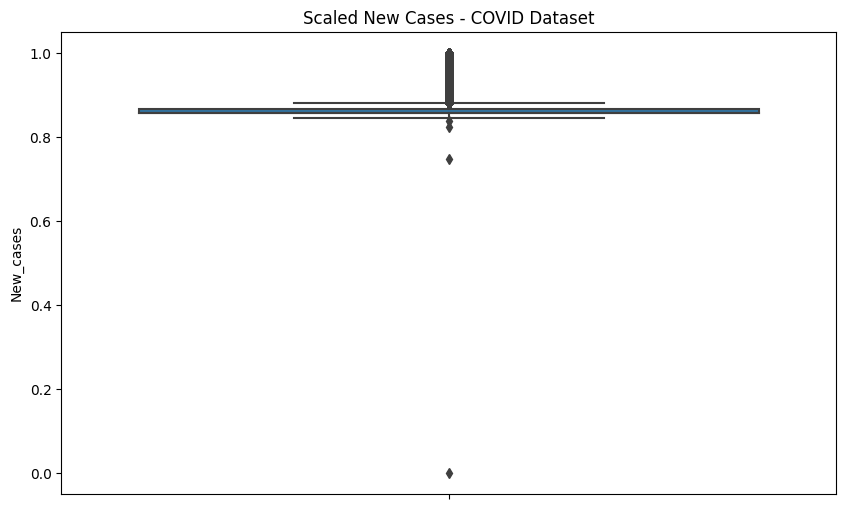

In [86]:
# Visualize the scaled New_cases for COVID dataset
plt.figure(figsize=(10, 6))
sns.boxplot(y=covid_data['New_cases'])
plt.title('Scaled New Cases - COVID Dataset')
plt.show()


In [87]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [88]:
def train_xgboost_model(data, feature_columns, target_column):
    # Prepare the features and target variable
    X = data[feature_columns]
    y = data[target_column]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create the XGBoost model
    xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

    # Train the model
    xg_model.fit(X_train, y_train)

    # Make predictions
    y_pred = xg_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model - MSE: {mse}, MAE: {mae}, R²: {r2}")
    return xg_model


In [89]:
# Assuming you have all your disease datasets ready as dataframes
disease_datasets = {
    'COVID-19': covid_data,
    'Hepatitis': hepatitis_data,
    'Measles': measles_data,
    'Mumps': mumps_data,
    'Pertussis': pertussis_data,
    'Polio': polio_data,
    'Rubella': rubella_data,
    'Smallpox': smallpox_data,
}


In [90]:
# Define features and target variable for each disease
features_dict = {
    'COVID-19': ['New_cases', 'New_deaths', 'Year', 'Month', 'Day'],
    'Hepatitis': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Measles': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Mumps': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Pertussis': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Polio': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Rubella': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Smallpox': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
}

# Train and evaluate XGBoost model for each disease
for disease, data in disease_datasets.items():
    print(f"Training model for {disease}:")
    target_column = 'New_cases' if disease == 'COVID-19' else 'cases'  # Adjust target column as needed
    train_xgboost_model(data, features_dict[disease], target_column)


Training model for COVID-19:
Model - MSE: 5.216890398129629e-07, MAE: 0.00014315302751664993, R²: 0.999591810575842
Training model for Hepatitis:
Model - MSE: 7.687933197147818e-11, MAE: 6.2543988531442435e-06, R²: 0.9999999989418175
Training model for Measles:
Model - MSE: 5.049902550404241e-06, MAE: 0.0006701570009168258, R²: 0.9999254796140855
Training model for Mumps:
Model - MSE: 3.800674776422081e-10, MAE: 7.118697986141897e-06, R²: 0.9999999942715097
Training model for Pertussis:
Model - MSE: 3.253600357471578e-10, MAE: 7.157202604608807e-06, R²: 0.9999999953340402
Training model for Polio:
Model - MSE: 7.011561347043046e-11, MAE: 5.69075994385073e-06, R²: 0.9999999989172859
Training model for Rubella:
Model - MSE: 8.289657744373476e-11, MAE: 6.4203773482001615e-06, R²: 0.9999999987650755
Training model for Smallpox:
Model - MSE: 8.4961691268131e-11, MAE: 6.6440427980952496e-06, R²: 0.9999999987660514


In [91]:
import joblib

# Save each model
for disease in disease_datasets.keys():
    target_column = 'New_cases' if disease == 'COVID-19' else 'cases'  # Define target column based on disease
    model = train_xgboost_model(disease_datasets[disease], features_dict[disease], target_column)
    joblib.dump(model, f"{disease}_xgboost_model.joblib")


Model - MSE: 5.216890398129629e-07, MAE: 0.00014315302751664993, R²: 0.999591810575842
Model - MSE: 7.687933197147818e-11, MAE: 6.2543988531442435e-06, R²: 0.9999999989418175
Model - MSE: 5.049902550404241e-06, MAE: 0.0006701570009168258, R²: 0.9999254796140855
Model - MSE: 3.800674776422081e-10, MAE: 7.118697986141897e-06, R²: 0.9999999942715097
Model - MSE: 3.253600357471578e-10, MAE: 7.157202604608807e-06, R²: 0.9999999953340402
Model - MSE: 7.011561347043046e-11, MAE: 5.69075994385073e-06, R²: 0.9999999989172859
Model - MSE: 8.289657744373476e-11, MAE: 6.4203773482001615e-06, R²: 0.9999999987650755
Model - MSE: 8.4961691268131e-11, MAE: 6.6440427980952496e-06, R²: 0.9999999987660514


In [92]:
def predict_with_model(model, new_data):
    predictions = model.predict(new_data)
    return predictions


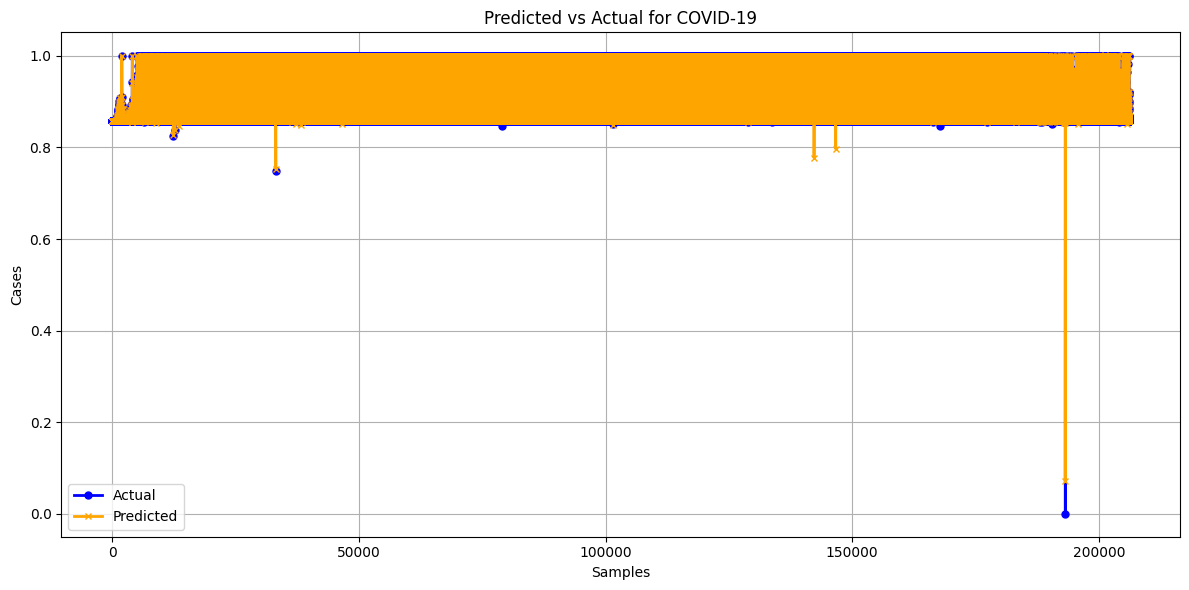

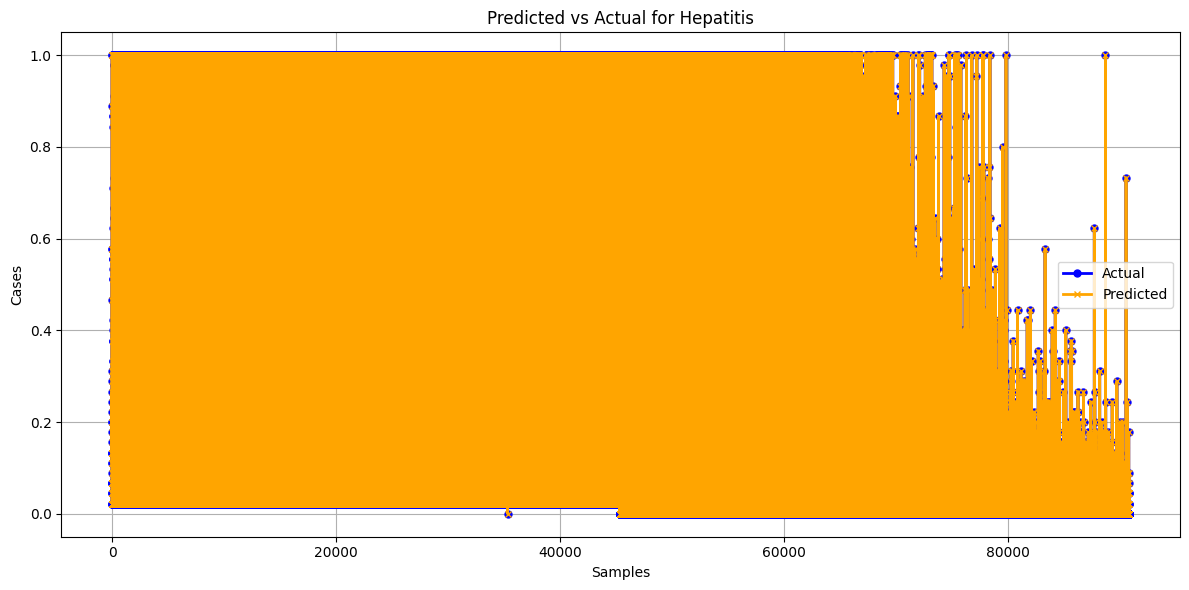

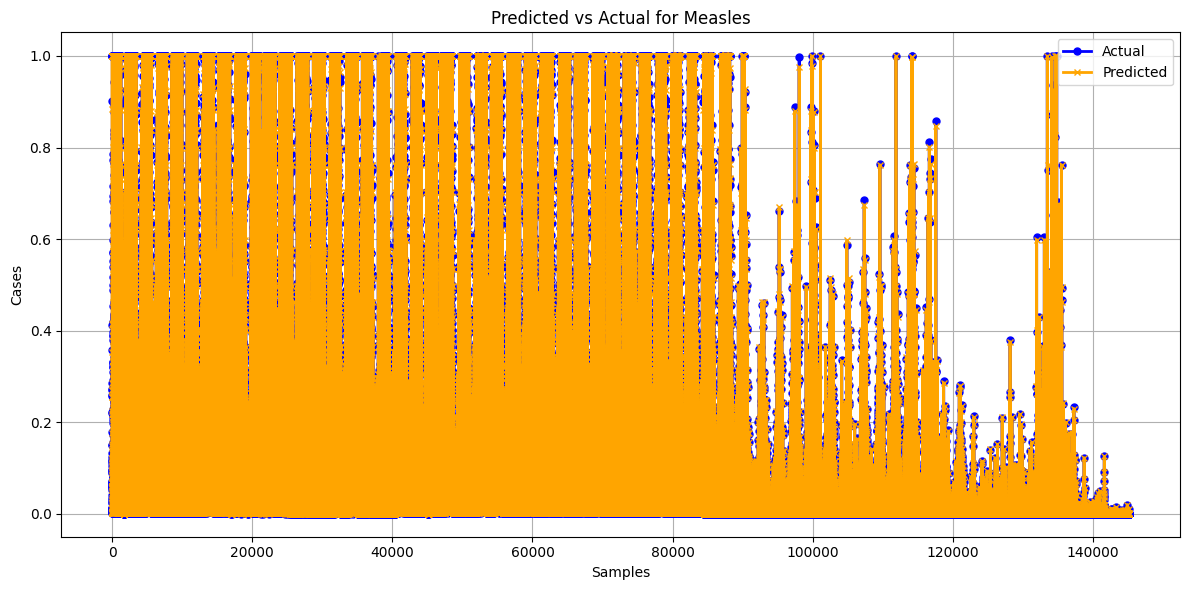

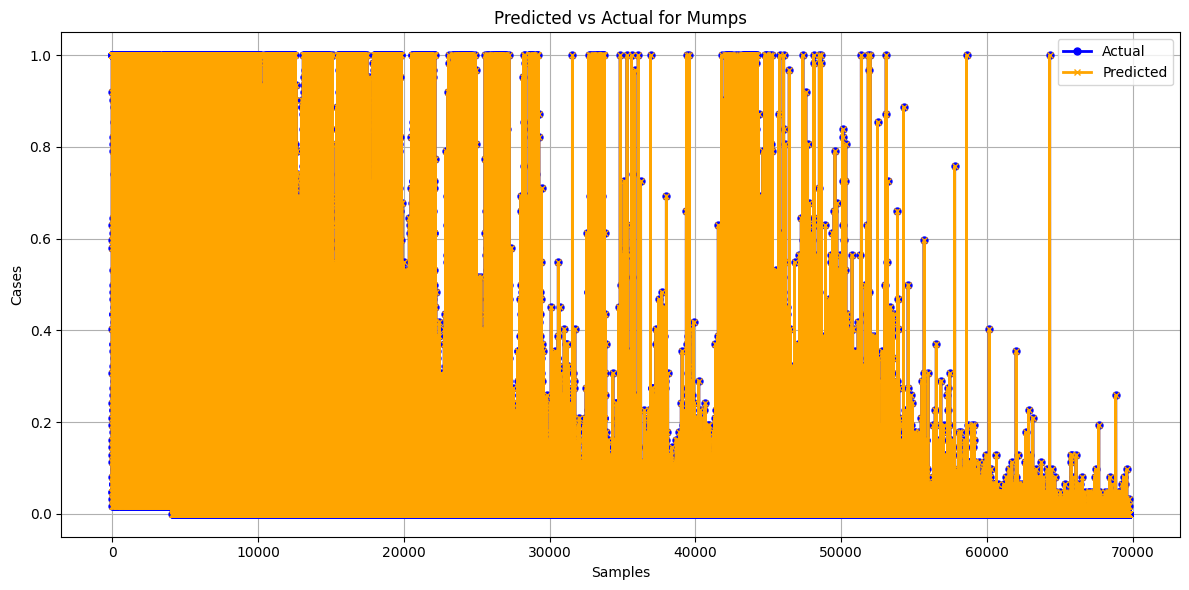

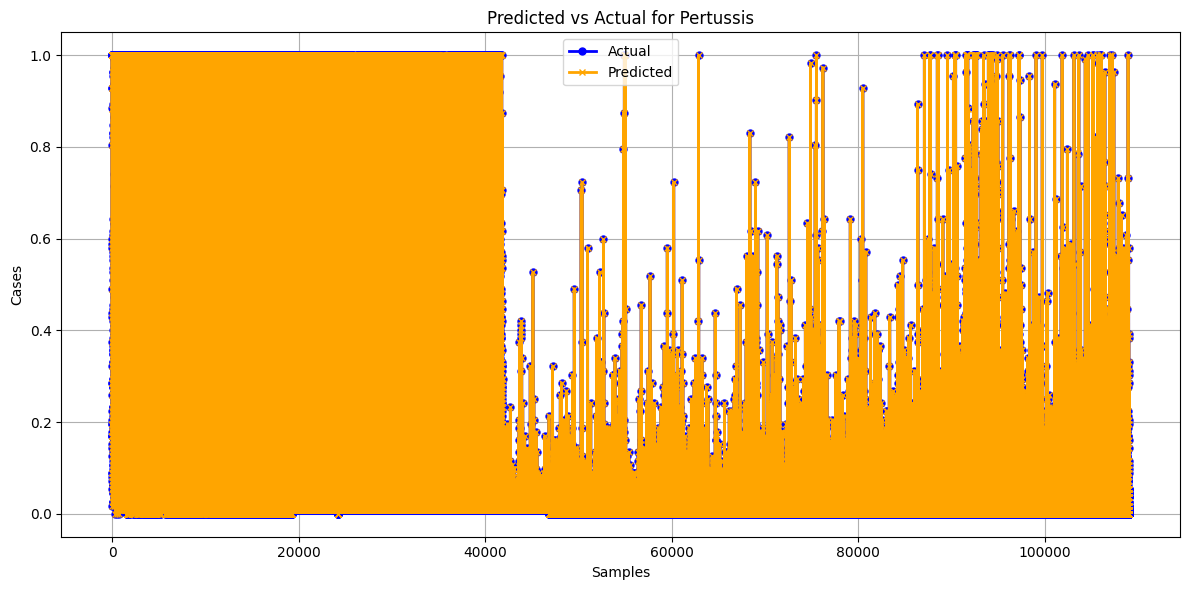

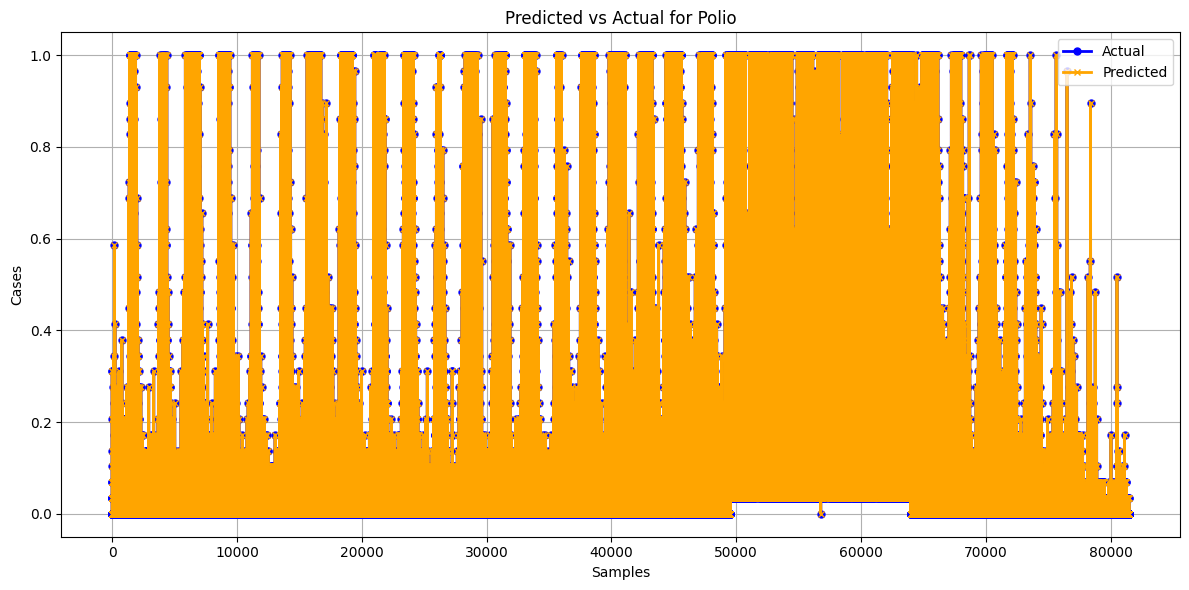

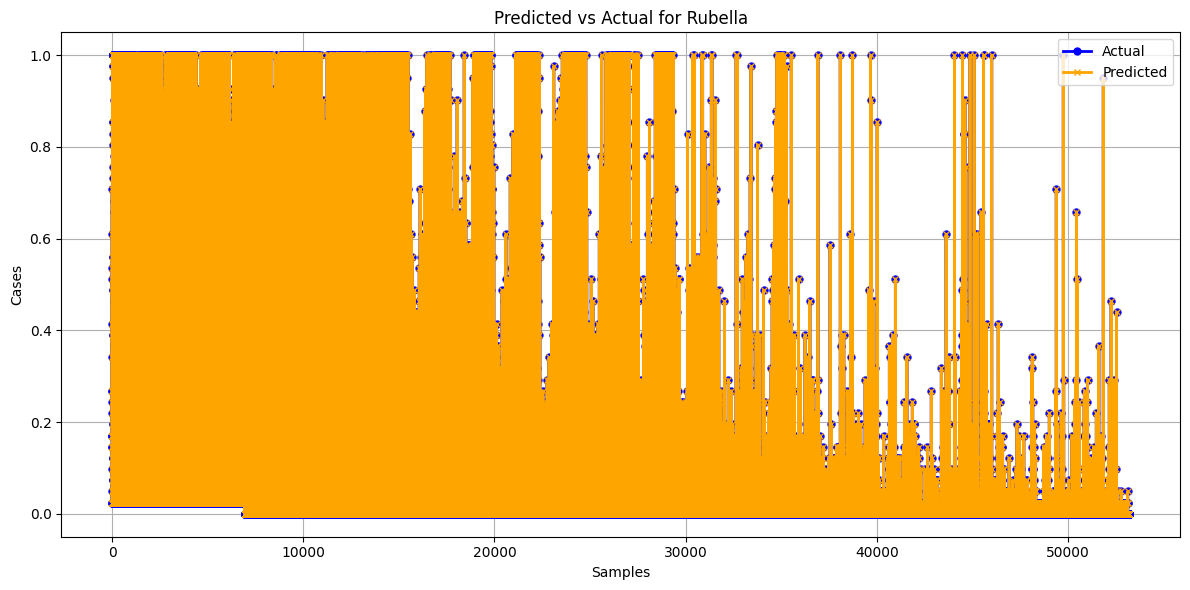

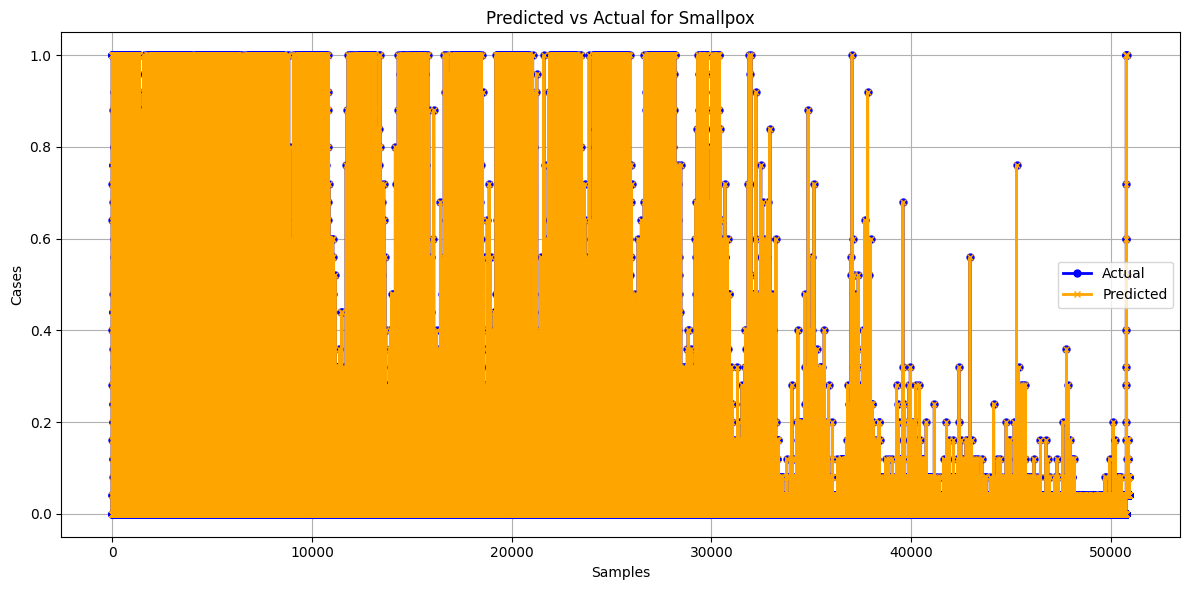

In [93]:
def visualize_predictions_line(y_test, y_pred, disease):
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Actual', color='blue', linewidth=2, marker='o', markersize=5)
    plt.plot(y_pred, label='Predicted', color='orange', linewidth=2, marker='x', markersize=5)
    plt.title(f'Predicted vs Actual for {disease}')
    plt.xlabel('Samples')
    plt.ylabel('Cases')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage for all diseases
for disease, data in disease_datasets.items():
    target_column = 'New_cases' if disease == 'COVID-19' else 'cases'
    model = joblib.load(f"{disease}_xgboost_model.joblib")
    y_pred = predict_with_model(model, data[features_dict[disease]])
    visualize_predictions_line(data[target_column], y_pred, disease)


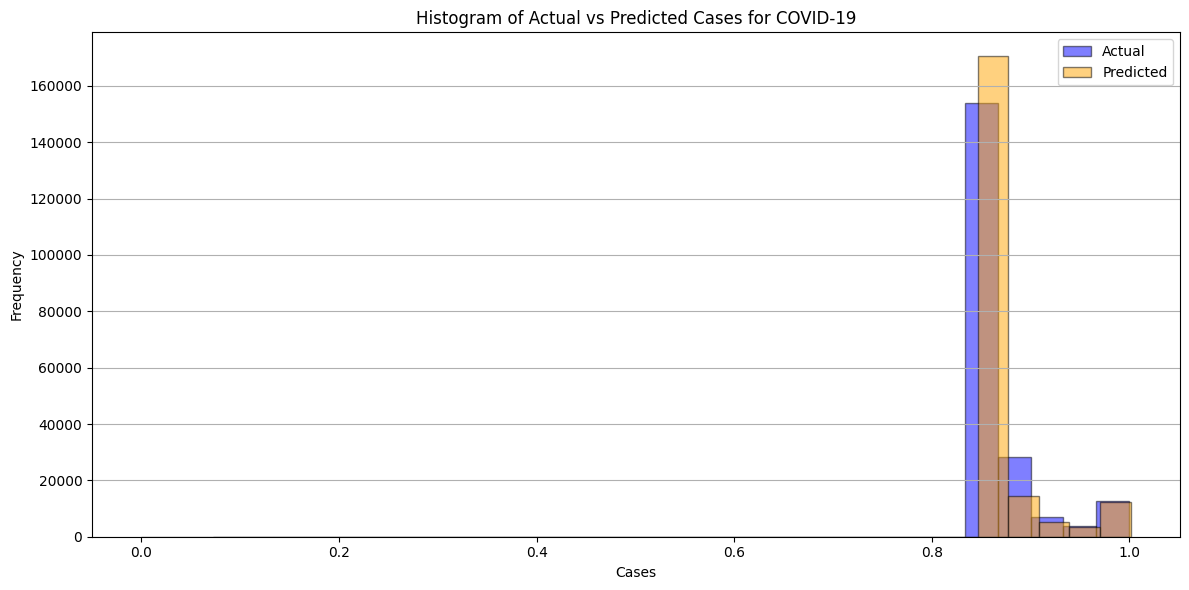

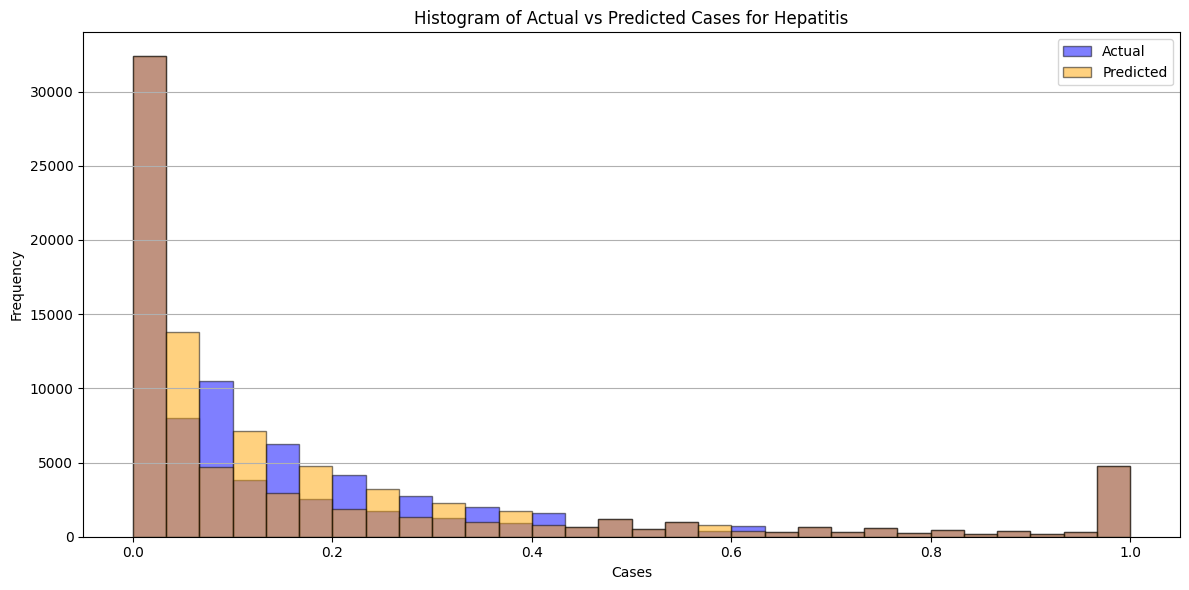

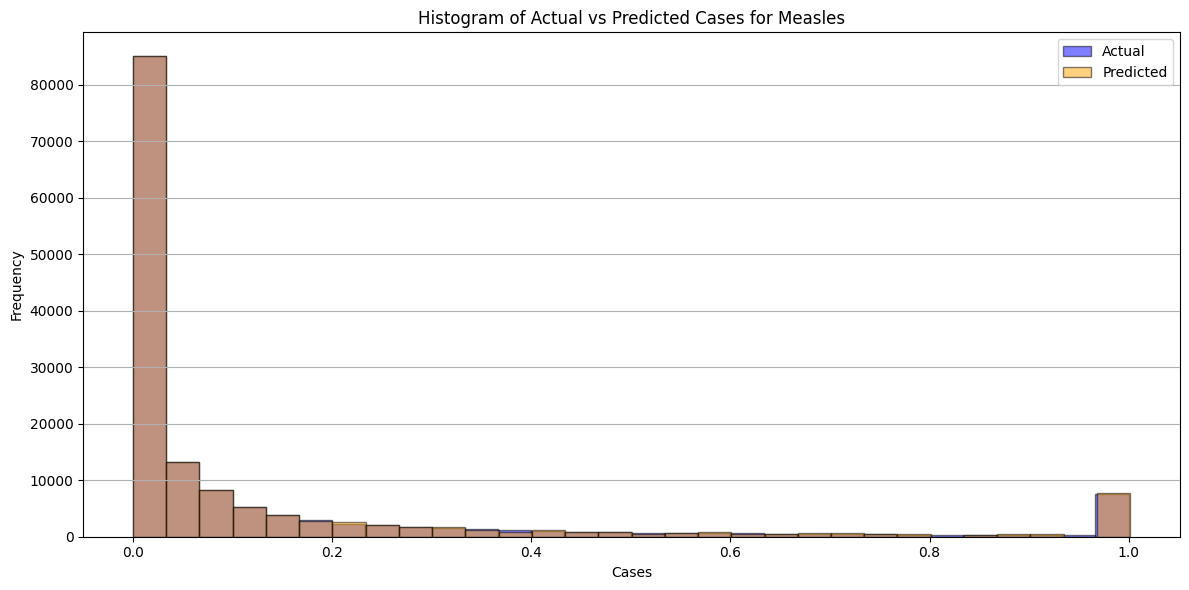

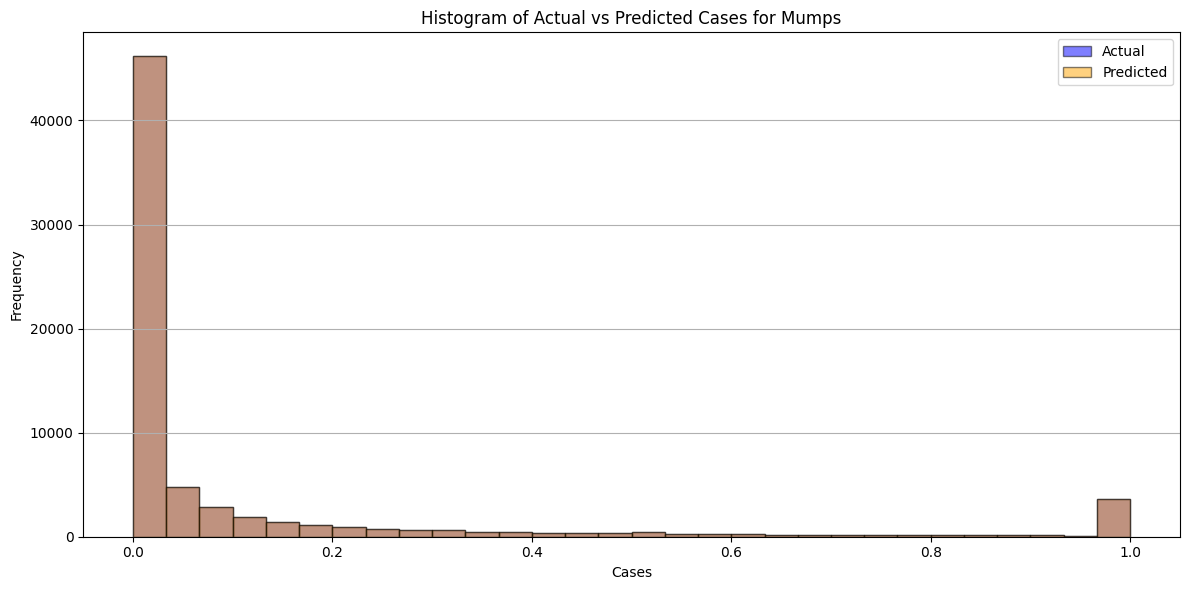

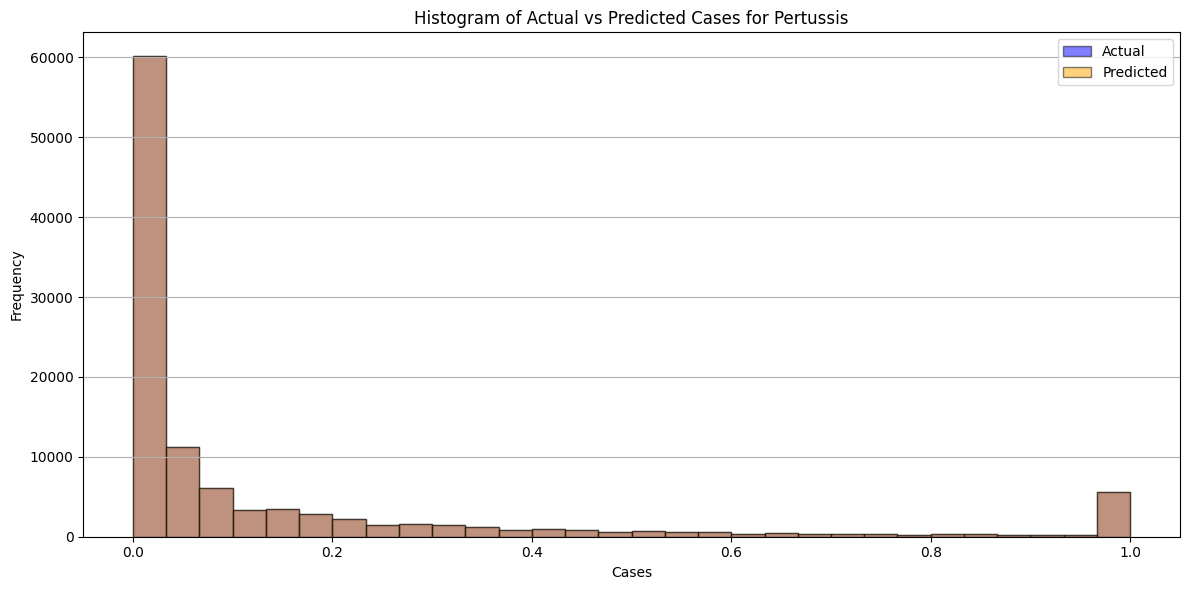

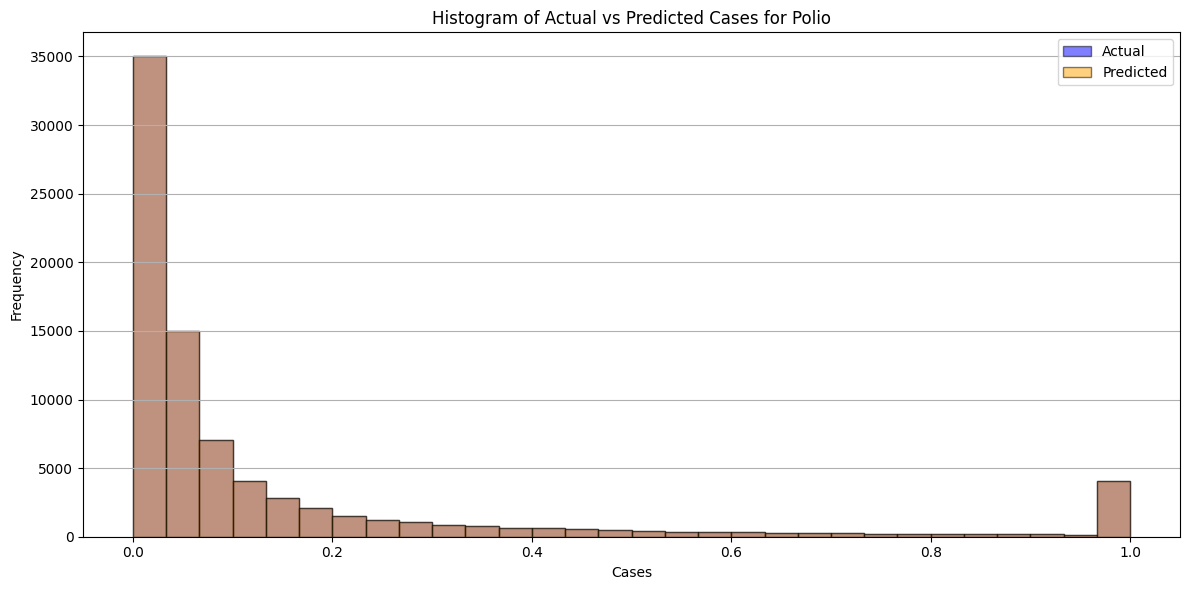

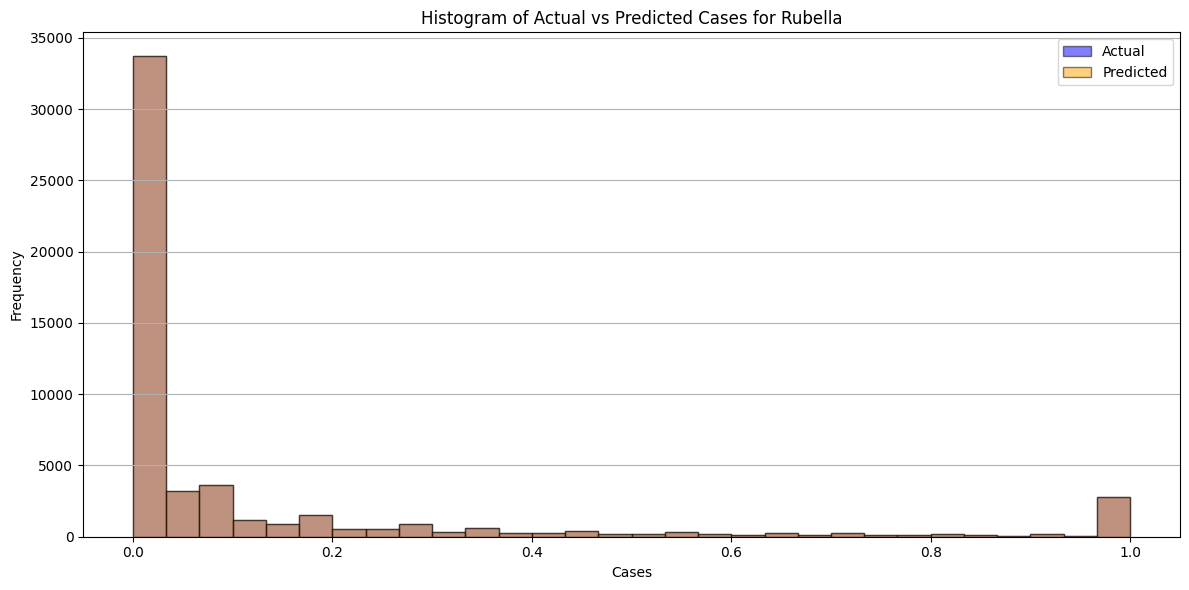

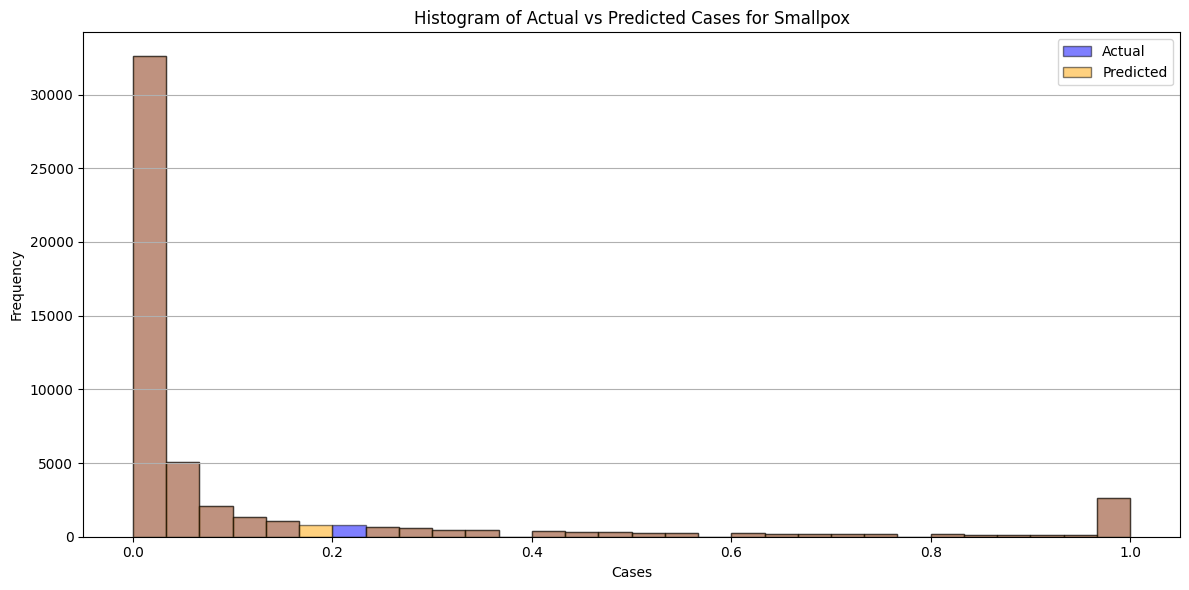

In [94]:
def visualize_predictions_histogram(y_test, y_pred, disease):
    plt.figure(figsize=(12, 6))
    plt.hist(y_test, bins=30, alpha=0.5, color='blue', label='Actual', edgecolor='black')
    plt.hist(y_pred, bins=30, alpha=0.5, color='orange', label='Predicted', edgecolor='black')
    plt.title(f'Histogram of Actual vs Predicted Cases for {disease}')
    plt.xlabel('Cases')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Example usage for all diseases
for disease, data in disease_datasets.items():
    target_column = 'New_cases' if disease == 'COVID-19' else 'cases'
    model = joblib.load(f"{disease}_xgboost_model.joblib")
    y_pred = predict_with_model(model, data[features_dict[disease]])
    visualize_predictions_histogram(data[target_column], y_pred, disease)


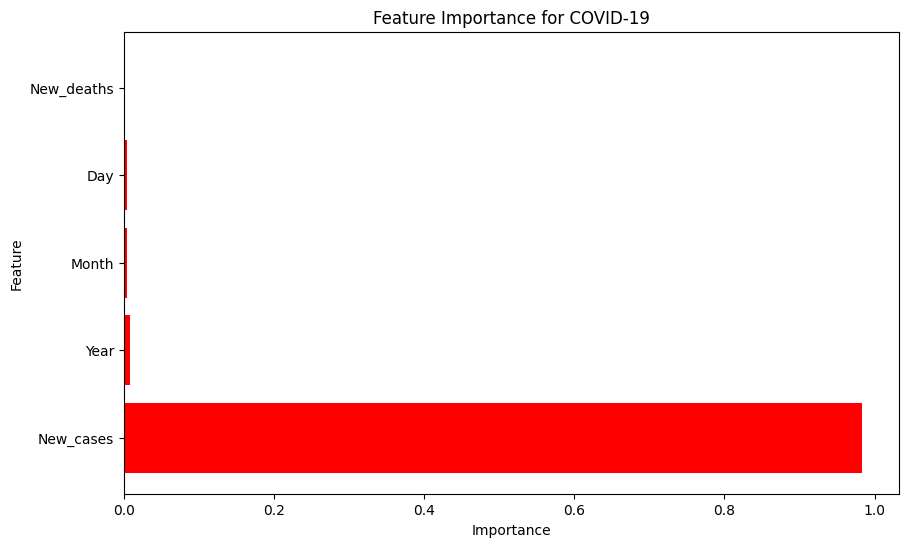

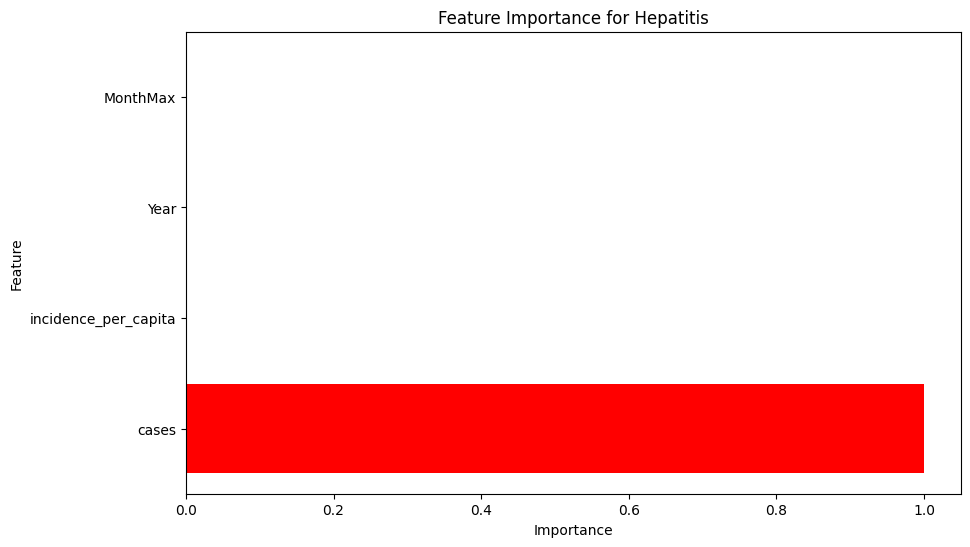

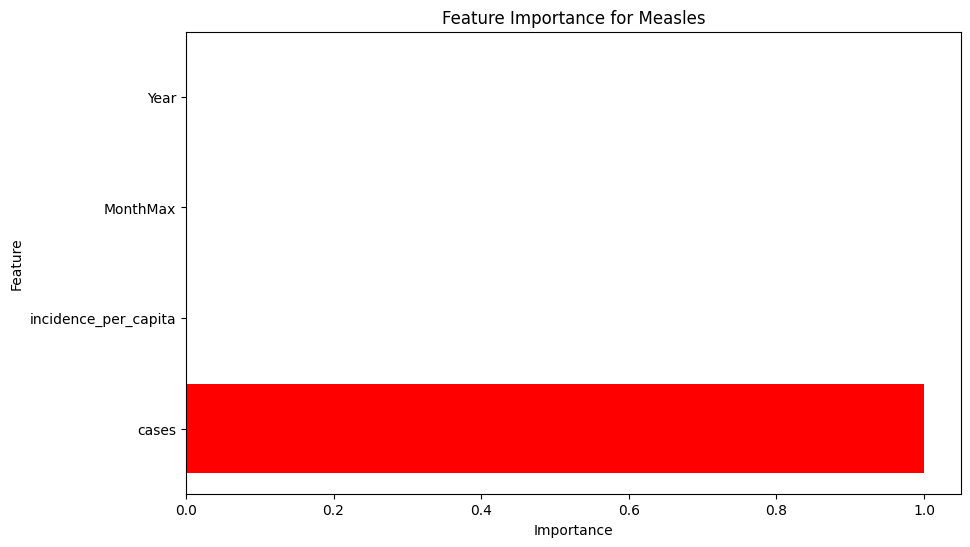

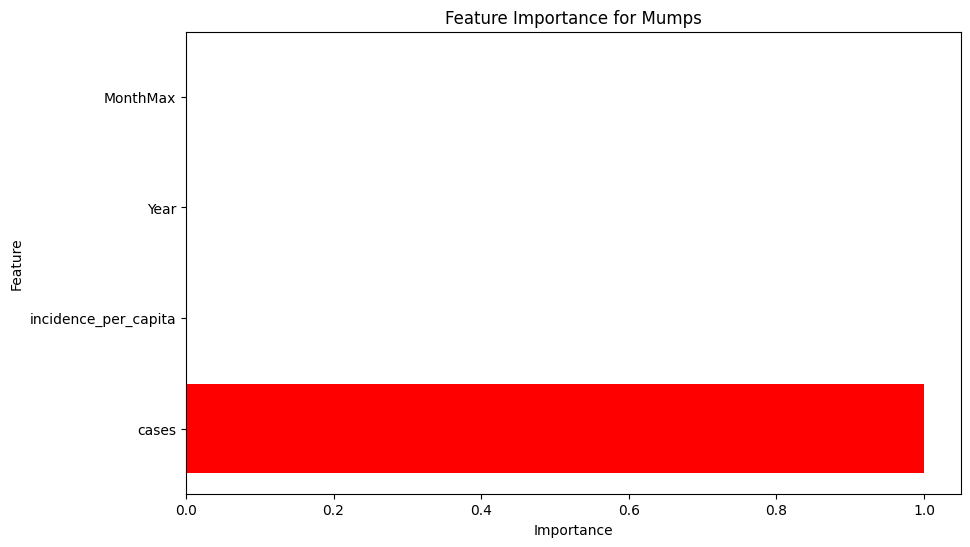

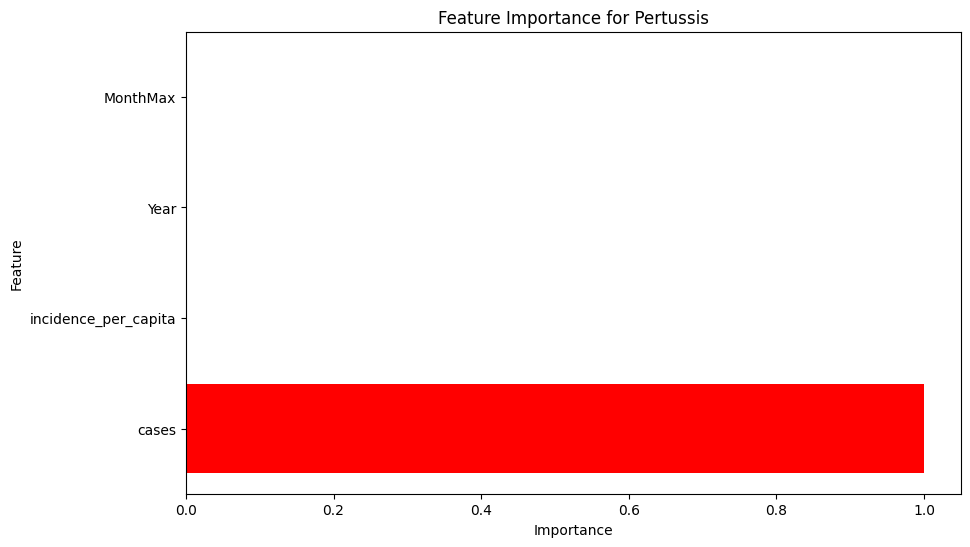

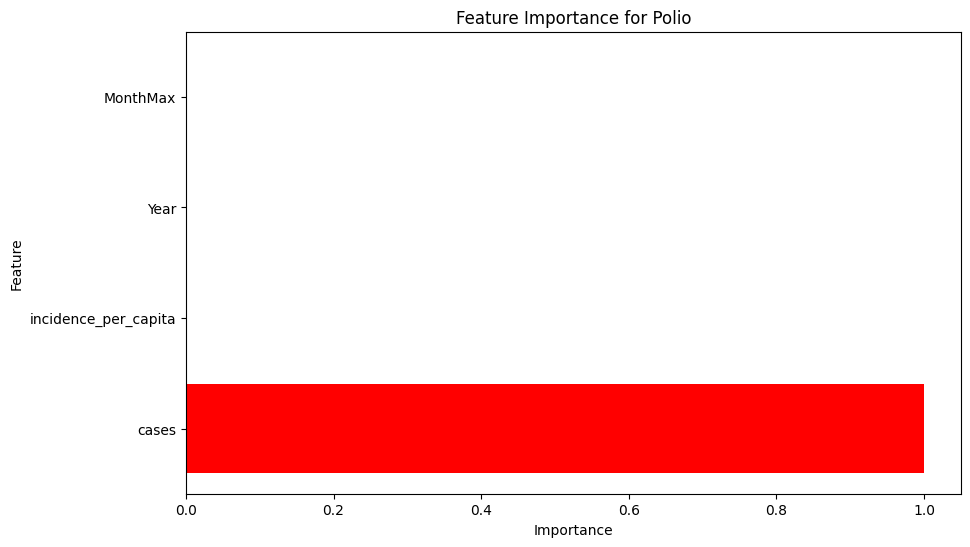

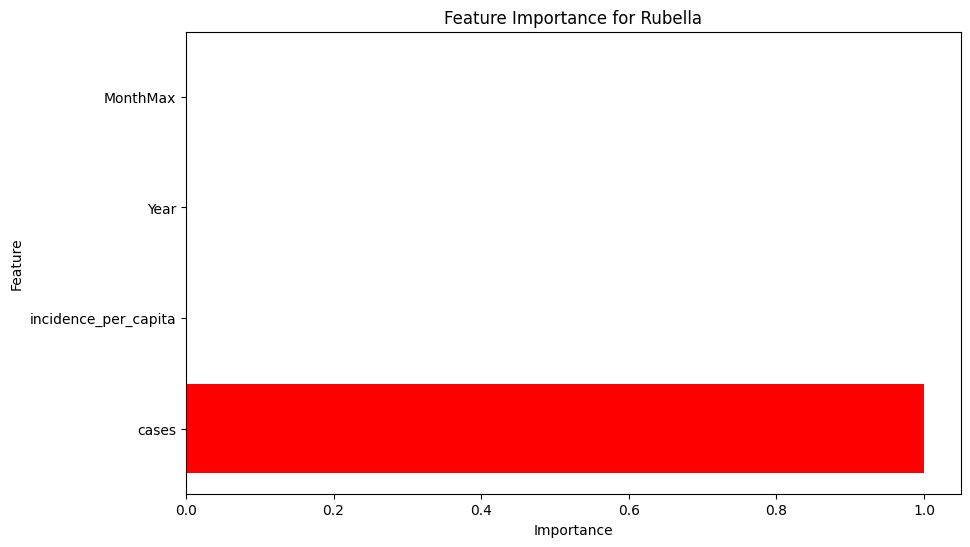

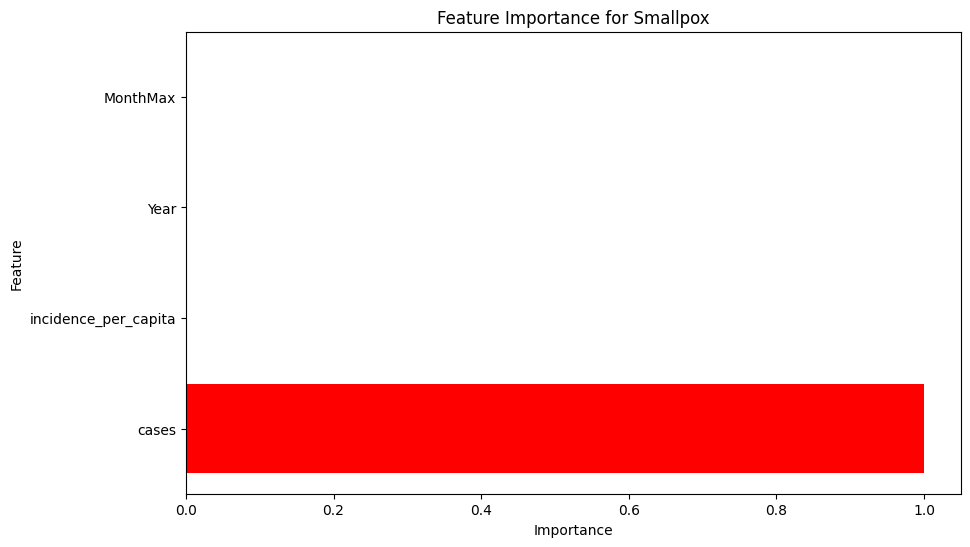

In [95]:
def plot_feature_importance(model, feature_columns, disease):
    importance = model.feature_importances_
    feature_importance = pd.DataFrame({'Feature': feature_columns, 'Importance': importance})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='red')
    plt.title(f'Feature Importance for {disease}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Example usage for all diseases
for disease in disease_datasets.keys():
    model = joblib.load(f"{disease}_xgboost_model.joblib")
    plot_feature_importance(model, features_dict[disease], disease)


In [96]:
from datetime import datetime, timedelta

In [101]:
def create_future_data(last_date, n_days, disease):
    future_dates = pd.date_range(start=last_date, periods=n_days + 1, freq='D')[1:]
    future_data = pd.DataFrame(future_dates, columns=['Date'])
    
    # Fill with zeros or any default values as needed
    if disease == 'COVID-19':
        future_data['New_cases'] = 0
        future_data['New_deaths'] = 0
        future_data['Year'] = future_data['Date'].dt.year
        future_data['Month'] = future_data['Date'].dt.month
        future_data['Day'] = future_data['Date'].dt.day
    else:
        future_data['cases'] = 0
        future_data['incidence_per_capita'] = 0
        future_data['Year'] = future_data['Date'].dt.year
        future_data['MonthMax'] = future_data['Date'].dt.month
    
    return future_data

In [102]:
def predict_future(model, future_data, feature_columns):
    future_features = future_data[feature_columns]
    predictions = model.predict(future_features)
    return predictions


In [103]:
def visualize_future_predictions(future_data, predictions, disease, target_column):
    future_data[target_column] = predictions
    plt.figure(figsize=(10, 6))
    plt.bar(future_data['Date'], future_data[target_column], color='orange')
    plt.xticks(rotation=45)
    plt.title(f'Predicted Future Trends for {disease}')
    plt.xlabel('Date')
    plt.ylabel('Predicted Cases')
    plt.tight_layout()
    plt.show()

In [108]:
# Number of days to predict
n_days = 90

# Define the feature columns for each disease
features_dict = {
    'COVID-19': ['New_cases', 'New_deaths', 'Year', 'Month', 'Day'],
    'Hepatitis': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Measles': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Mumps': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Pertussis': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Polio': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Rubella': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Smallpox': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
}

In [109]:
last_covid_date = covid_data['Date_reported'].max()
future_covid_data = create_future_data(last_covid_date, n_days, 'COVID-19')

In [110]:
covid_model = joblib.load('COVID-19_xgboost_model.joblib')
covid_predictions = predict_future(covid_model, future_covid_data, features_dict['COVID-19'])

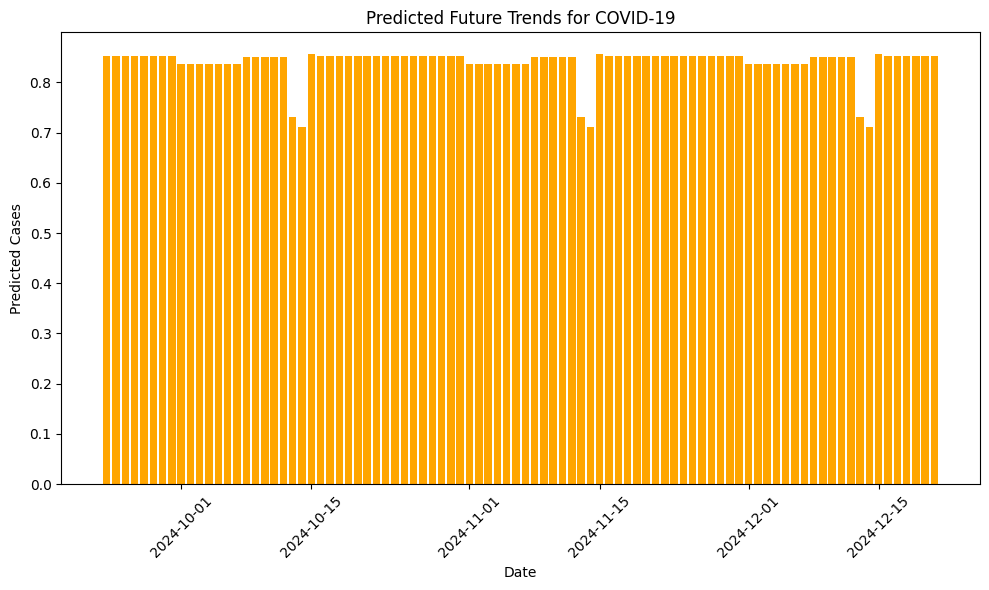

In [113]:
visualize_future_predictions(future_covid_data, covid_predictions, 'COVID-19', 'New_cases')

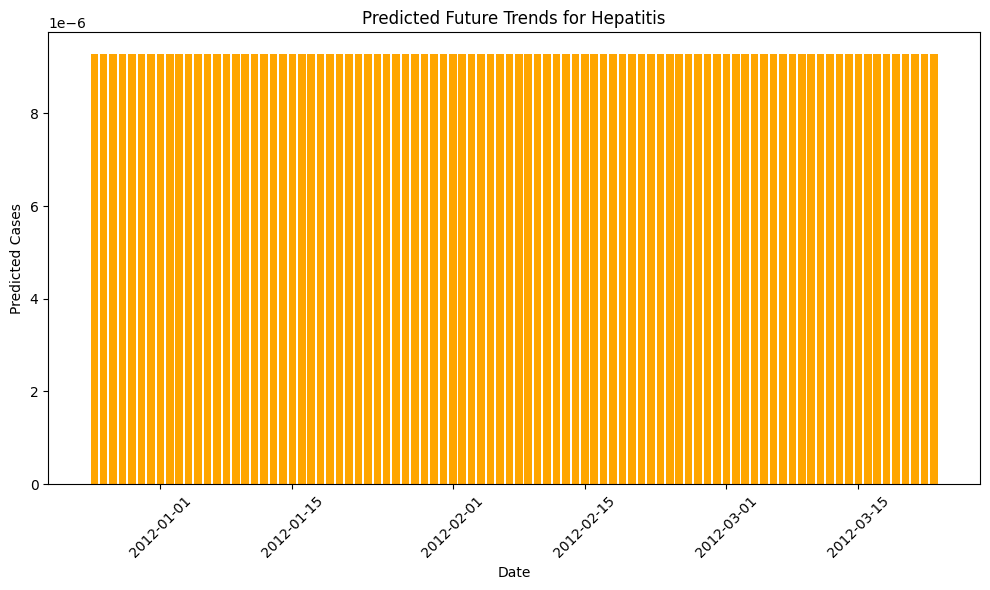

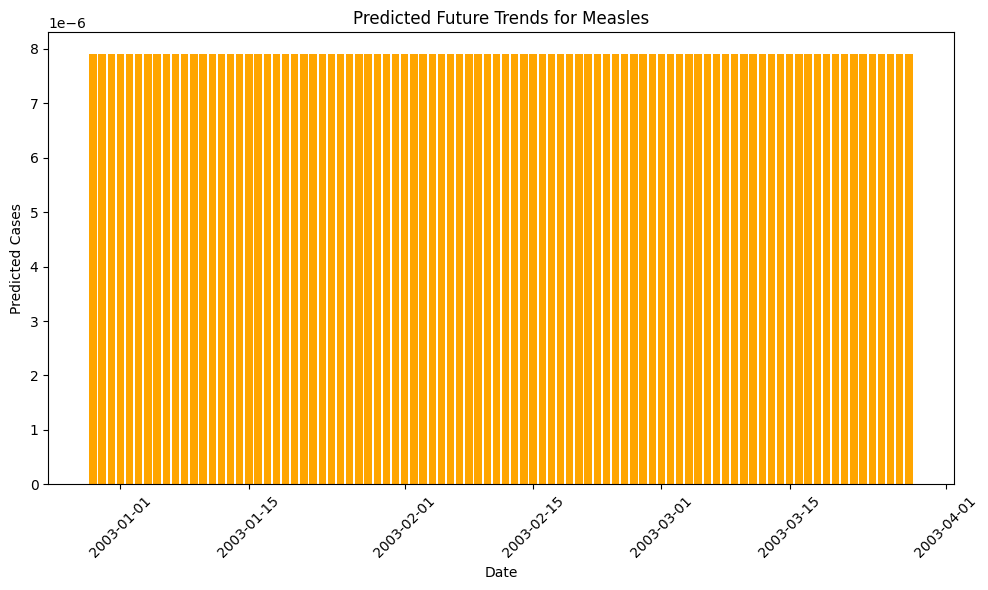

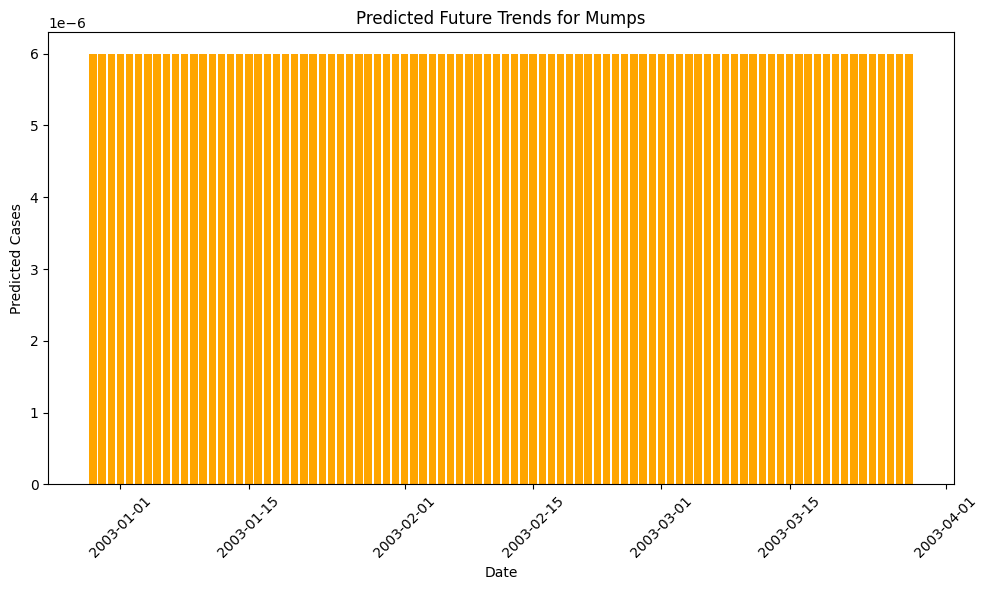

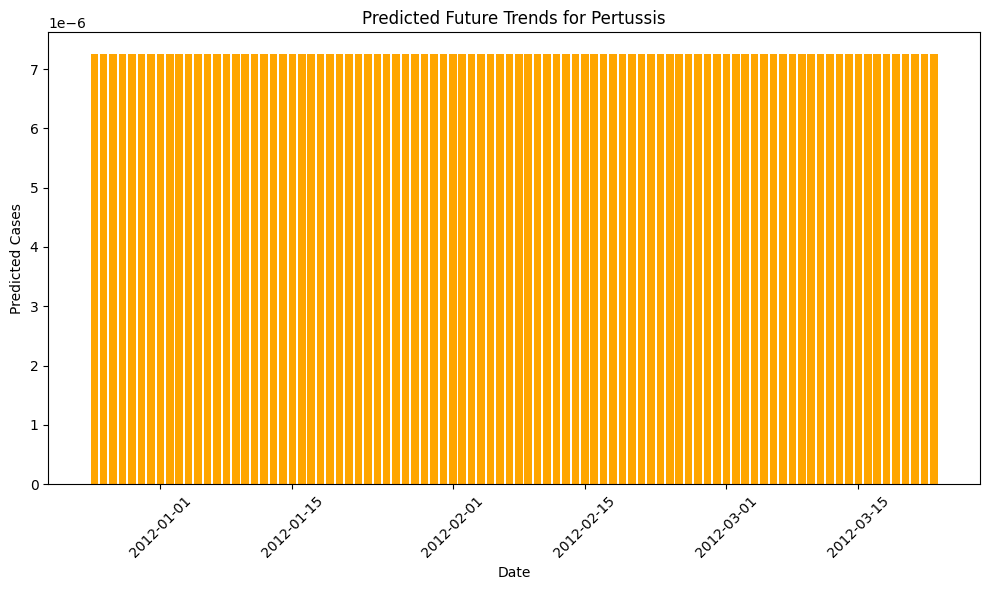

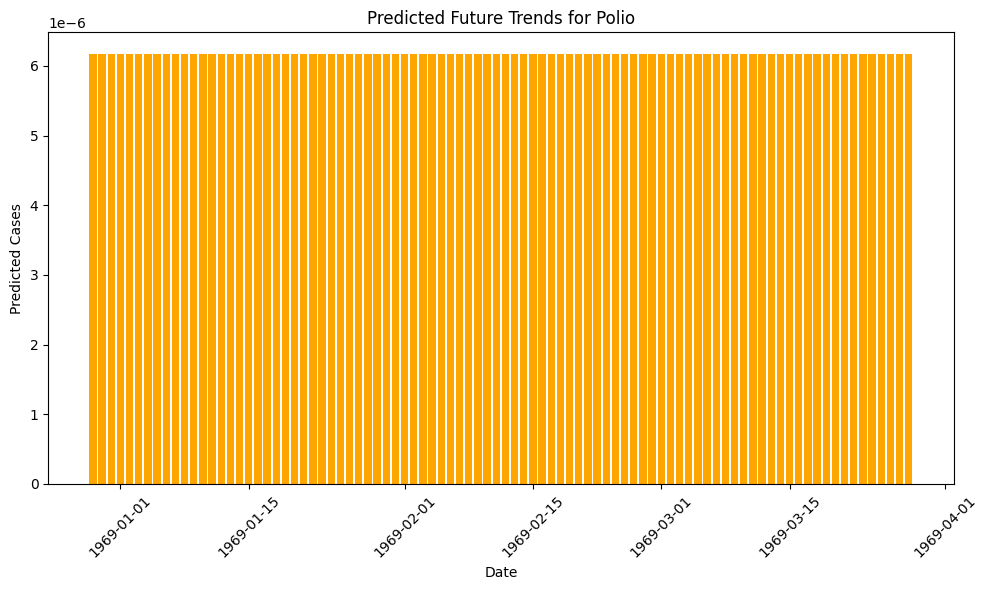

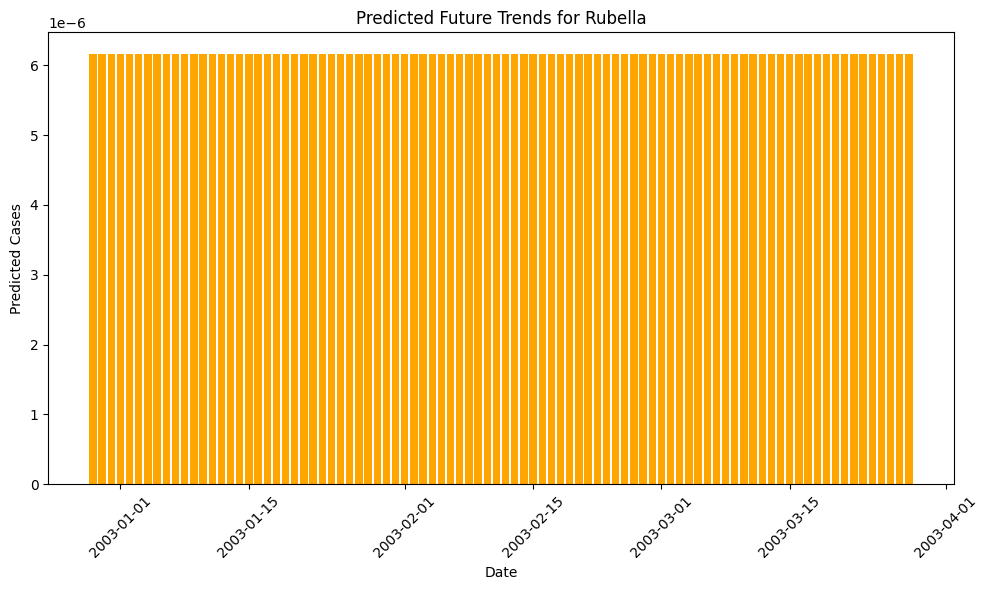

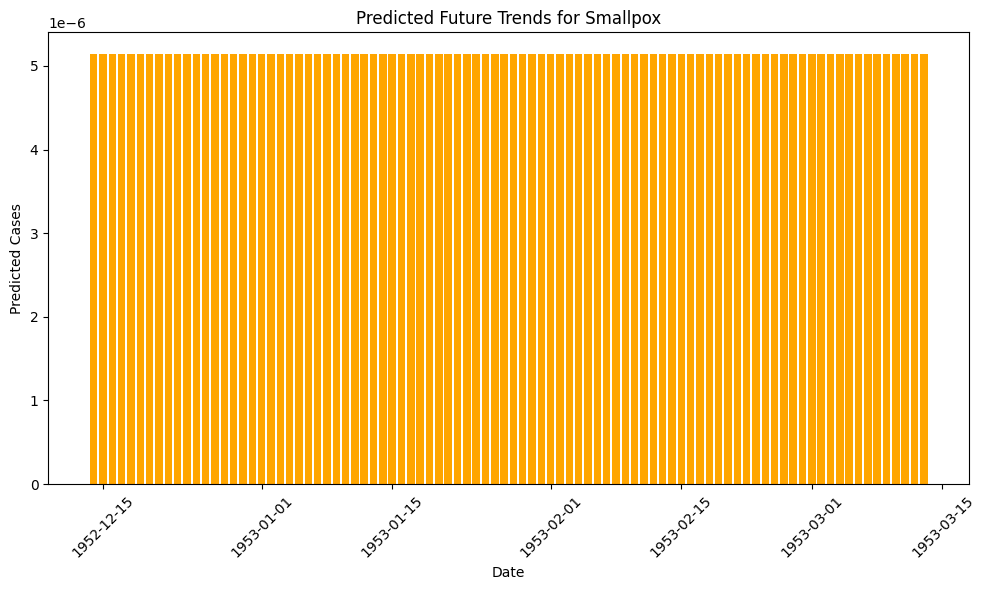

In [114]:
for disease, data in disease_datasets.items():
    if disease != 'COVID-19':
        last_disease_date = data['LastDayWeek'].max()
        future_disease_data = create_future_data(last_disease_date, n_days, disease)
        
        # Load the corresponding model
        disease_model = joblib.load(f"{disease}_xgboost_model.joblib")
        
        # Predict future trends
        disease_predictions = predict_future(disease_model, future_disease_data, features_dict[disease])
        
        # Visualize future predictions for the disease
        visualize_future_predictions(future_disease_data, disease_predictions, disease, 'cases')

In [1]:
import joblib
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd

In [2]:
covid_model = joblib.load(r'D:\Hackathon\models\COVID-19_xgboost_model.joblib')
hepatitis_model = joblib.load(r'D:\Hackathon\models\Hepatitis_xgboost_model.joblib')
measles_model = joblib.load(r'D:\Hackathon\models\Measles_xgboost_model.joblib')
mumps_model = joblib.load(r'D:\Hackathon\models\Mumps_xgboost_model.joblib')
pertussis_model = joblib.load(r'D:\Hackathon\models\Pertussis_xgboost_model.joblib')
polio_model = joblib.load(r'D:\Hackathon\models\Polio_xgboost_model.joblib')
rubella_model = joblib.load(r'D:\Hackathon\models\Rubella_xgboost_model.joblib')
smallpox_model = joblib.load(r'D:\Hackathon\models\Smallpox_xgboost_model.joblib')

In [3]:
features_dict = {
    'COVID-19': ['New_cases', 'New_deaths', 'Year', 'Month', 'Day'],  # Month here is derived from the Date
    'Hepatitis': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Measles': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Mumps': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Pertussis': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Polio': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Rubella': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Smallpox': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
}

In [5]:
def create_future_data(year, disease):
    future_dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='M')
    future_data = pd.DataFrame(future_dates, columns=['Date'])
    
    future_data['Year'] = future_data['Date'].dt.year
    
    if disease == 'COVID-19':
        future_data['New_cases'] = 0
        future_data['New_deaths'] = 0
        future_data['Month'] = future_data['Date'].dt.month  # Use Month from Date
        future_data['Day'] = future_data['Date'].dt.day
    else:
        future_data['cases'] = 0
        future_data['incidence_per_capita'] = 0
        future_data['MonthMax'] = future_data['Date'].dt.month  # Use MonthMax for other diseases
    
    return future_data

# Function to predict disease cases
def predict_disease(disease, year):
    future_data = create_future_data(year, disease)
    
    features = future_data[features_dict[disease]]
    
    if disease == 'COVID-19':
        predictions = covid_model.predict(features)
    elif disease == 'Hepatitis':
        predictions = hepatitis_model.predict(features)
    elif disease == 'Measles':
        predictions = measles_model.predict(features)
    elif disease == 'Mumps':
        predictions = mumps_model.predict(features)
    elif disease == 'Pertussis':
        predictions = pertussis_model.predict(features)
    elif disease == 'Polio':
        predictions = polio_model.predict(features)
    elif disease == 'Rubella':
        predictions = rubella_model.predict(features)
    elif disease == 'Smallpox':
        predictions = smallpox_model.predict(features)
    
    future_data['Predicted Cases'] = predictions
    return future_data


In [6]:
pio.renderers.default = 'browser'

# Function to plot predictions
def plot_predictions(predictions, disease):
    fig = go.Figure()

    # Use Month for COVID-19 and MonthMax for other diseases
    month_column = 'Month' if disease == 'COVID-19' else 'MonthMax'
    
    # Plotting the predictions
    fig.add_trace(go.Scatter3d(
        x=predictions['Year'],
        y=predictions[month_column],  # Use the correct month column
        z=predictions['Predicted Cases'],
        mode='markers',
        marker=dict(size=5, color='orange'),
        name='Predicted Cases'
    ))

    fig.update_layout(title=f'Predicted Cases for {disease} in {predictions["Year"].iloc[0]}',
                      scene=dict(
                          xaxis_title='Year',
                          yaxis_title='Month',
                          zaxis_title='Predicted Cases'
                      ))

    # Show the plot in the browser
    fig.show()


In [8]:
disease = 'COVID-19'  # Change this to test other diseases
year = 2024  # Replace with input for testing

# Get predictions and plot
predictions = predict_disease(disease, year)
plot_predictions(predictions, disease)

In [13]:
import pandas as pd
import joblib
import plotly.graph_objects as go
import plotly.io as pio

# Load your models
covid_model = joblib.load(r'D:\Hackathon\models\COVID-19_xgboost_model.joblib')
hepatitis_model = joblib.load(r'D:\Hackathon\models\Hepatitis_xgboost_model.joblib')
measles_model = joblib.load(r'D:\Hackathon\models\Measles_xgboost_model.joblib')
mumps_model = joblib.load(r'D:\Hackathon\models\Mumps_xgboost_model.joblib')
pertussis_model = joblib.load(r'D:\Hackathon\models\Pertussis_xgboost_model.joblib')
polio_model = joblib.load(r'D:\Hackathon\models\Polio_xgboost_model.joblib')
rubella_model = joblib.load(r'D:\Hackathon\models\Rubella_xgboost_model.joblib')
smallpox_model = joblib.load(r'D:\Hackathon\models\Smallpox_xgboost_model.joblib')

# Features dictionary
features_dict = {
    'COVID-19': ['New_cases', 'New_deaths', 'Year', 'Month', 'Day'],
    'Hepatitis': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Measles': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Mumps': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Pertussis': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Polio': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Rubella': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Smallpox': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
}

# Function to create future data based on user input
def create_future_data(year, disease, country=None, state=None):
    future_dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='M')
    future_data = pd.DataFrame(future_dates, columns=['Date'])
    
    if disease == 'COVID-19':
        future_data['New_cases'] = 0
        future_data['New_deaths'] = 0
        future_data['Year'] = future_data['Date'].dt.year
        future_data['Month'] = future_data['Date'].dt.month
        future_data['Day'] = future_data['Date'].dt.day
        future_data['Country'] = country  # Add country information
    else:
        future_data['cases'] = 0
        future_data['incidence_per_capita'] = 0
        future_data['Year'] = future_data['Date'].dt.year
        future_data['MonthMax'] = future_data['Date'].dt.month_name()
        future_data['state_name'] = state  # Add state information
    
    return future_data

def predict_disease(disease, year, country=None, state=None):
    future_data = create_future_data(year, disease, country, state)
    
    # Encode any categorical features if necessary
    # You may need to handle encoding here if your model expects it

    features = future_data[features_dict[disease]]

    if disease == 'COVID-19':
        predictions = covid_model.predict(features)
    elif disease == 'Hepatitis':
        predictions = hepatitis_model.predict(features)
    elif disease == 'Measles':
        predictions = measles_model.predict(features)
    elif disease == 'Mumps':
        predictions = mumps_model.predict(features)
    elif disease == 'Pertussis':
        predictions = pertussis_model.predict(features)
    elif disease == 'Polio':
        predictions = polio_model.predict(features)
    elif disease == 'Rubella':
        predictions = rubella_model.predict(features)
    elif disease == 'Smallpox':
        predictions = smallpox_model.predict(features)
    
    # Add predictions to the DataFrame
    if disease == 'COVID-19':
        future_data['Predicted Cases'] = predictions
    else:
        future_data['Predicted Cases'] = predictions
    
    return future_data

def plot_map(predictions, disease):
    fig = go.Figure()

    if disease == 'COVID-19':
        # Assuming Country is a column in predictions DataFrame
        fig.add_trace(go.Choropleth(
            z=predictions['Predicted Cases'],
            locations=predictions['Country'],  # Map locations by country
            locationmode='country names',
            colorscale='Viridis',
            colorbar_title='Predicted Cases',
        ))
    else:
        # Assuming state_name is a column in predictions DataFrame
        fig.add_trace(go.Choropleth(
            z=predictions['Predicted Cases'],
            locations=predictions['state_name'],  # Map locations by state
            locationmode='USA-states',  # Change if your states are in another format
            colorscale='Viridis',
            colorbar_title='Predicted Cases',
        ))

    fig.update_layout(title_text=f'Predicted Cases for {disease} in {year}',
                      geo=dict(showlakes=True, lakecolor='rgb(85, 173, 240)'))
    fig.show()

# Example usage:
disease = 'COVID-19'  # Change to test other diseases
year = 2024  # Replace with input for testing
country = 'Canada'  # Replace with a valid country name for COVID-19
state = 'California'  # Replace with a valid state name for other diseases

# Get predictions and plot
predictions = predict_disease(disease, year, country, state)
plot_map(predictions, disease)


In [9]:
import joblib
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd

# Load models
covid_model = joblib.load(r'D:\Hackathon\models\COVID-19_xgboost_model.joblib')
hepatitis_model = joblib.load(r'D:\Hackathon\models\Hepatitis_xgboost_model.joblib')
measles_model = joblib.load(r'D:\Hackathon\models\Measles_xgboost_model.joblib')
mumps_model = joblib.load(r'D:\Hackathon\models\Mumps_xgboost_model.joblib')
pertussis_model = joblib.load(r'D:\Hackathon\models\Pertussis_xgboost_model.joblib')
polio_model = joblib.load(r'D:\Hackathon\models\Polio_xgboost_model.joblib')
rubella_model = joblib.load(r'D:\Hackathon\models\Rubella_xgboost_model.joblib')
smallpox_model = joblib.load(r'D:\Hackathon\models\Smallpox_xgboost_model.joblib')

# Features dictionary
features_dict = {
    'COVID-19': ['New_cases', 'New_deaths', 'Year', 'Month', 'Day'],
    'Hepatitis': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Measles': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Mumps': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Pertussis': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Polio': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Rubella': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Smallpox': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
}

# Function to create future data
def create_future_data(year, disease):
    future_dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='M')
    future_data = pd.DataFrame(future_dates, columns=['Date'])
    
    future_data['Year'] = future_data['Date'].dt.year
    
    if disease == 'COVID-19':
        future_data['New_cases'] = 0
        future_data['New_deaths'] = 0
        future_data['Month'] = future_data['Date'].dt.month
        future_data['Day'] = future_data['Date'].dt.day
    else:
        future_data['cases'] = 0
        future_data['incidence_per_capita'] = 0
        future_data['MonthMax'] = future_data['Date'].dt.month
    
    return future_data

# Function to predict disease cases
def predict_disease(disease, year):
    future_data = create_future_data(year, disease)
    features = future_data[features_dict[disease]]
    
    if disease == 'COVID-19':
        predictions = covid_model.predict(features)
    elif disease == 'Hepatitis':
        predictions = hepatitis_model.predict(features)
    elif disease == 'Measles':
        predictions = measles_model.predict(features)
    elif disease == 'Mumps':
        predictions = mumps_model.predict(features)
    elif disease == 'Pertussis':
        predictions = pertussis_model.predict(features)
    elif disease == 'Polio':
        predictions = polio_model.predict(features)
    elif disease == 'Rubella':
        predictions = rubella_model.predict(features)
    elif disease == 'Smallpox':
        predictions = smallpox_model.predict(features)
    
    future_data['Predicted Cases'] = predictions
    return future_data

# Function to plot predictions and save as HTML
def plot_predictions(predictions, disease, year):
    fig = go.Figure()

    # Use Month for COVID-19 and MonthMax for other diseases
    month_column = 'Month' if disease == 'COVID-19' else 'MonthMax'
    
    # Plotting the predictions
    fig.add_trace(go.Scatter3d(
        x=predictions['Year'],
        y=predictions[month_column],  # Use the correct month column
        z=predictions['Predicted Cases'],
        mode='markers',
        marker=dict(size=5, color='orange'),
        name='Predicted Cases'
    ))

    fig.update_layout(title=f'Predicted Cases for {disease} in {year}',
                      scene=dict(
                          xaxis_title='Year',
                          yaxis_title='Month',
                          zaxis_title='Predicted Cases'
                      ))

    # Show the plot in the browser
    fig.show()

    # Save the plot as an HTML file
    html_file = f'predicted_cases_{disease}_{year}.html'
    pio.write_html(fig, file=html_file)
    print(f"3D plot saved as {html_file}")

# Main execution
disease = 'COVID-19'  # Change this to test other diseases
year = 2025 # Replace with input for testing

# Get predictions and plot
predictions = predict_disease(disease, year)
plot_predictions(predictions, disease, year)


3D plot saved as predicted_cases_COVID-19_2025.html


In [10]:
import pandas as pd
import joblib
import plotly.graph_objects as go

# Load your models
covid_model = joblib.load(r'D:\Hackathon\models\COVID-19_xgboost_model.joblib')
hepatitis_model = joblib.load(r'D:\Hackathon\models\Hepatitis_xgboost_model.joblib')
measles_model = joblib.load(r'D:\Hackathon\models\Measles_xgboost_model.joblib')
mumps_model = joblib.load(r'D:\Hackathon\models\Mumps_xgboost_model.joblib')
pertussis_model = joblib.load(r'D:\Hackathon\models\Pertussis_xgboost_model.joblib')
polio_model = joblib.load(r'D:\Hackathon\models\Polio_xgboost_model.joblib')
rubella_model = joblib.load(r'D:\Hackathon\models\Rubella_xgboost_model.joblib')
smallpox_model = joblib.load(r'D:\Hackathon\models\Smallpox_xgboost_model.joblib')

# Features dictionary
features_dict = {
    'COVID-19': ['New_cases', 'New_deaths', 'Year', 'Month', 'Day'],
    'Hepatitis': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Measles': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Mumps': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Pertussis': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Polio': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Rubella': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
    'Smallpox': ['cases', 'incidence_per_capita', 'Year', 'MonthMax'],
}

# Function to create future data based on user input
def create_future_data(year, disease, country=None, state=None):
    future_dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='M')
    future_data = pd.DataFrame(future_dates, columns=['Date'])
    
    if disease == 'COVID-19':
        future_data['New_cases'] = 0
        future_data['New_deaths'] = 0
        future_data['Year'] = future_data['Date'].dt.year
        future_data['Month'] = future_data['Date'].dt.month
        future_data['Day'] = future_data['Date'].dt.day
        future_data['Country'] = country  # Add country information
    else:
        future_data['cases'] = 0
        future_data['incidence_per_capita'] = 0
        future_data['Year'] = future_data['Date'].dt.year
        future_data['MonthMax'] = future_data['Date'].dt.month  # Numeric month
        future_data['state_name'] = state  # Add state information
    
    return future_data

def predict_disease(disease, year, country=None, state=None):
    future_data = create_future_data(year, disease, country, state)
    
    # Extract features for prediction
    features = future_data[features_dict[disease]]

    # Convert categorical features to appropriate type
    if disease != 'COVID-19':
        features['MonthMax'] = features['MonthMax'].astype('category')  # Convert MonthMax to category

    # Make predictions based on the disease
    if disease == 'COVID-19':
        predictions = covid_model.predict(features)
    else:
        predictions = globals()[f"{disease.lower()}_model"].predict(features)
    
    # Add predictions to the DataFrame
    future_data['Predicted Cases'] = predictions
    
    return future_data

def plot_map(predictions, disease):
    fig = go.Figure()

    if disease == 'COVID-19':
        fig.add_trace(go.Choropleth(
            z=predictions['Predicted Cases'],
            locations=predictions['Country'],  # Map locations by country
            locationmode='country names',
            colorscale='Viridis',
            colorbar_title='Predicted Cases',
        ))
    else:
        fig.add_trace(go.Choropleth(
            z=predictions['Predicted Cases'],
            locations=predictions['state_name'],  # Map locations by state
            locationmode='USA-states',
            colorscale='Viridis',
            colorbar_title='Predicted Cases',
        ))

    fig.update_layout(title_text=f'Predicted Cases for {disease} in {year}',
                      geo=dict(showlakes=True, lakecolor='rgb(85, 173, 240)'))
    fig.show()

# Example usage:
disease = 'COVID-19'  # Change to test other diseases
year = 2024  # Replace with input for testing
country = 'Brazil'  # Replace with a valid country name for COVID-19
state = 'ALABAMA'  # Replace with a valid state name for other diseases

# Get predictions and plot
predictions = predict_disease(disease, year, country, state)
plot_map(predictions, disease)
